# MCH-MFT Track Matching - Multi Layer Perceptron Regressor

Using adam optimization

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import time
import sys

from ML_matcher_helpers import *

results_list = []

Starting benchmarks on 13 Nov 2020 16:49:40
Loading CSV from data_10000MCHTraks_20Mu_10PiPerEvent
Features...
Truth array...
MCH track ranges...
CSV loaded!
Loading CSV from data_1000MCHTraks_20Mu_1200PiPerEvent
Features...
Truth array...
MCH track ranges...
CSV loaded!
Starting benchmark: (30,30,20) max_iter: 30000 activation = relu on 13 Nov 2020 16:50:32
{'hidden_layers_cfg': (30, 30, 20), 'solver': 'adam', 'max_iter': 30000, 'activation': 'relu', 'trainning_data_file': 'data_10000MCHTraks_20Mu_10PiPerEvent', 'test_data_file': 'data_1000MCHTraks_20Mu_1200PiPerEvent'}
Trainning MLPRegressor on 13 Nov 2020 16:50:32
mlpr trainning time =  0.5496418742499373  minutes
Trainning Accuracy:  0.9252362126788357
Running MLPRegressor prediction...
Match_pred type: <class 'numpy.ndarray'>
Prediction accuracy:
 0.17241357437836258
Summarizing results on 13 Nov 2020 16:51:07
Scores type: <class 'numpy.ndarray'>
[-0.0038855 -0.0038855 -0.0038855 ... -0.0038855 -0.0038855 -0.0038855]


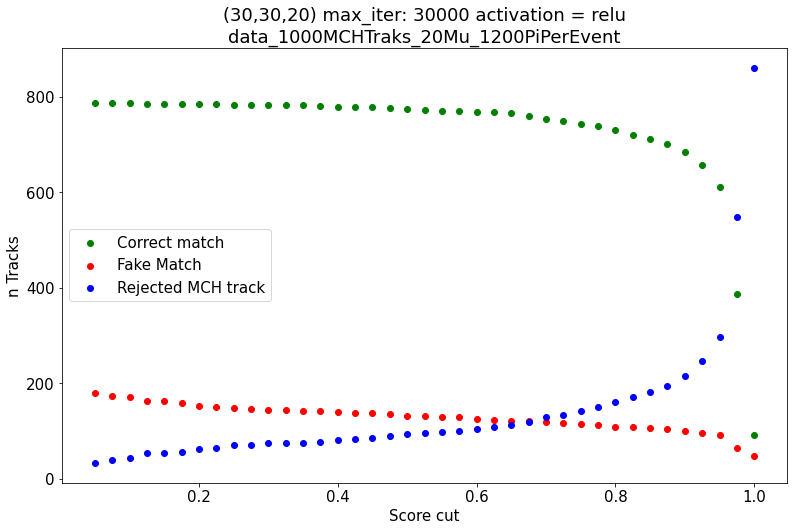

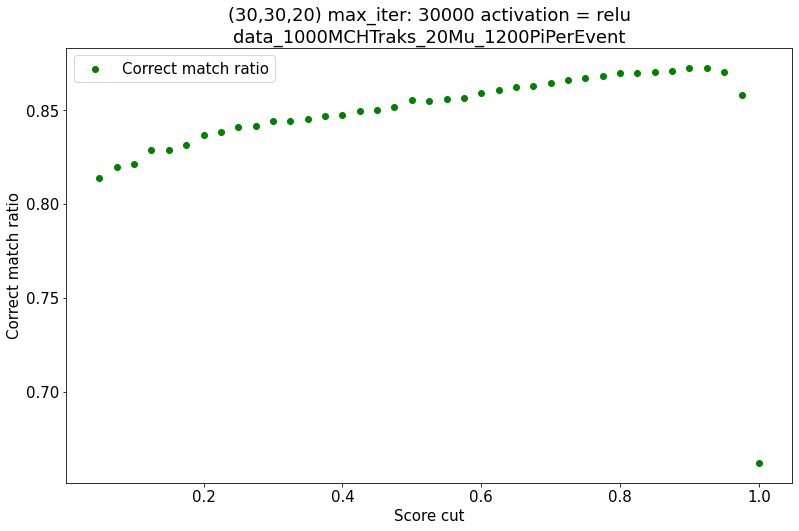

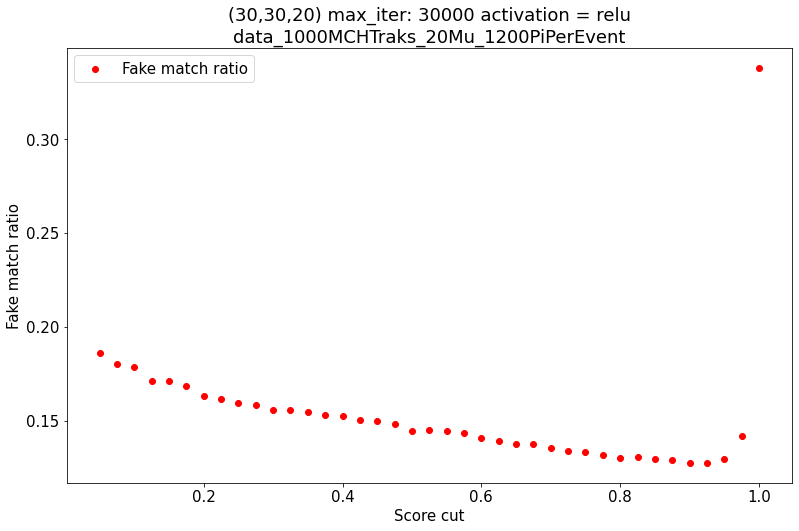

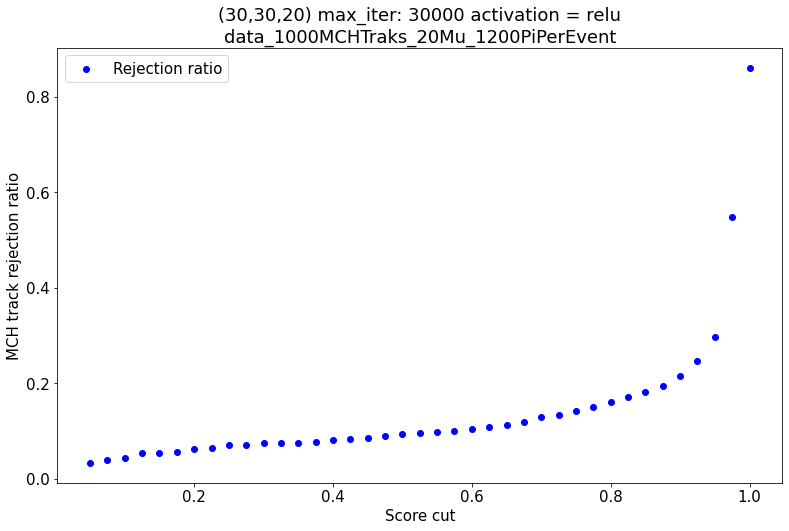

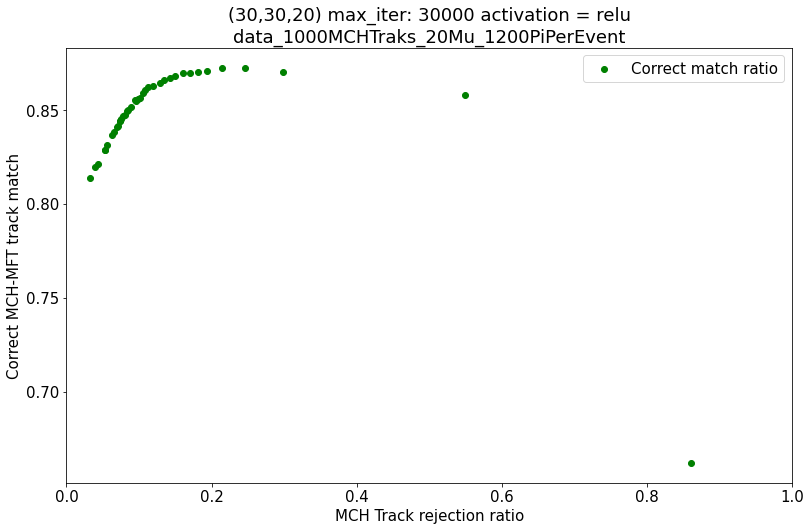

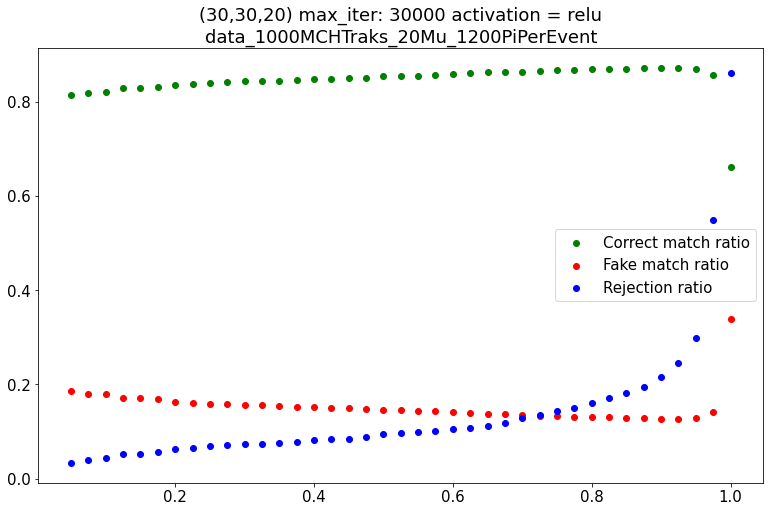

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [787. 787. 786. 785. 785. 785. 784. 784. 782. 782. 782. 782. 782. 781.
 779. 779. 778. 776. 775. 773. 771. 770. 769. 768. 766. 760. 753. 750.
 743. 738. 730. 721. 712. 702. 685. 658. 611. 387.  92.]
fake matches:  [180. 173. 171. 162. 162. 159. 153. 151. 148. 147. 144. 144. 143. 141.
 140. 138. 137. 135. 131. 131. 130. 129. 126. 124. 122. 121. 118. 116.
 114. 112. 109. 108. 106. 104. 100.  96.  91.  64.  47.]
no matches:  [ 33.  40.  43.  53.  53.  56.  63.  65.  70.  71.  74.  74.  75.  78.
  81.  83.  85.  89.  94.  96.  99. 101. 105. 108. 112. 119. 129. 134.
 143. 150. 161. 171. 182. 194. 215. 246. 298. 549. 861.]
Elapsed time benchmark ((30,30,20) max_iter: 30000 activation = relu) => 35.91759465599898 s
Starting benchmar

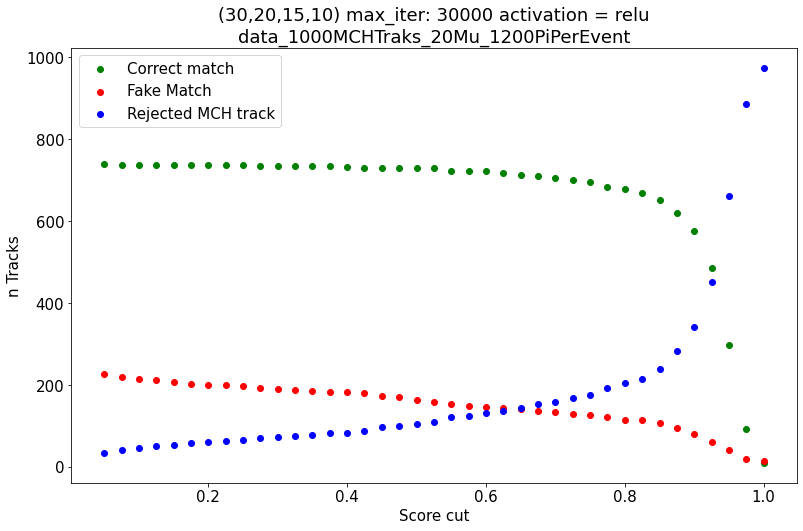

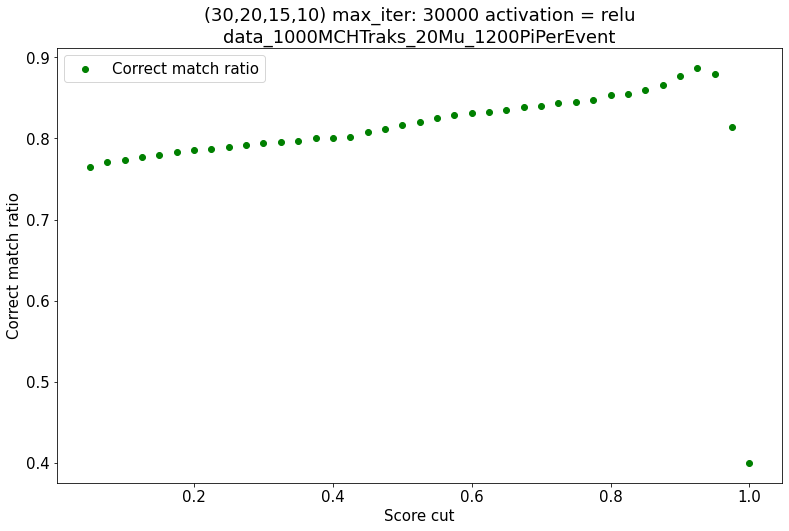

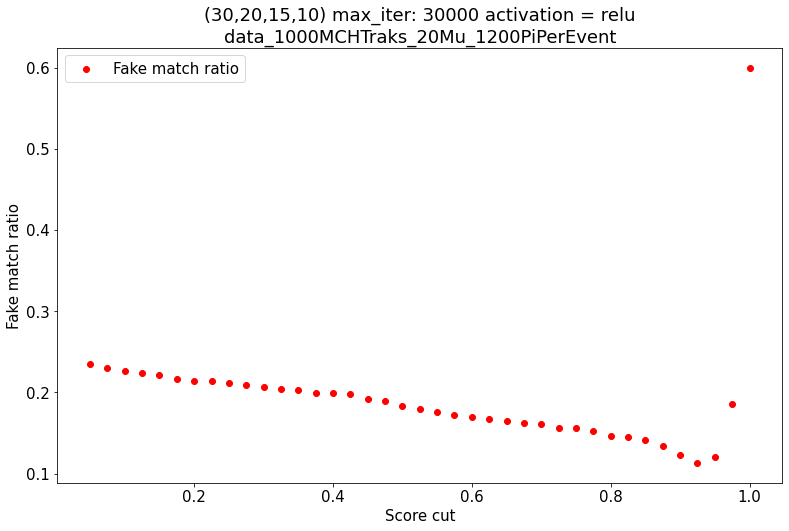

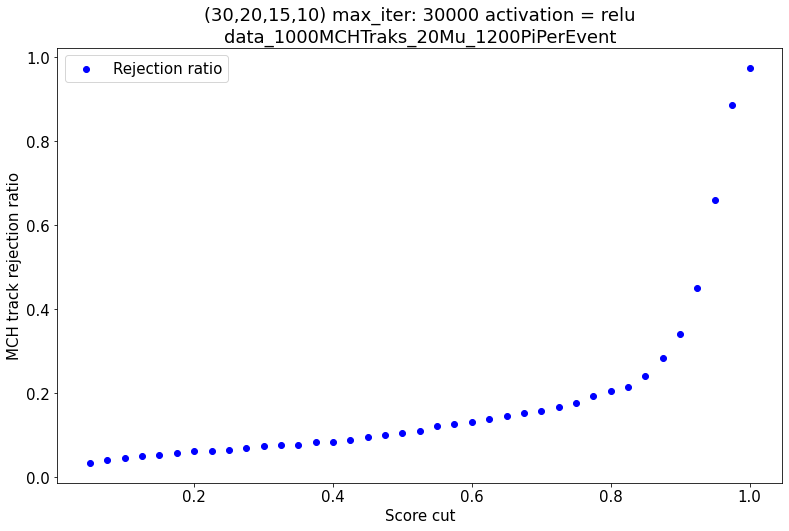

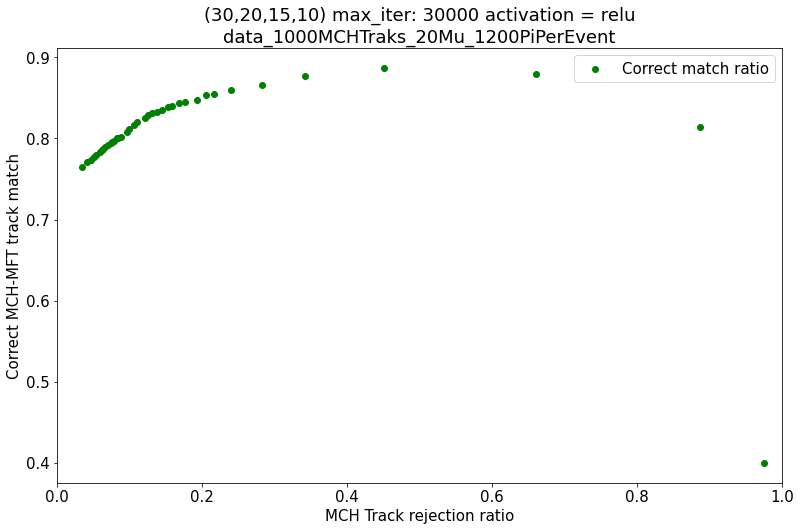

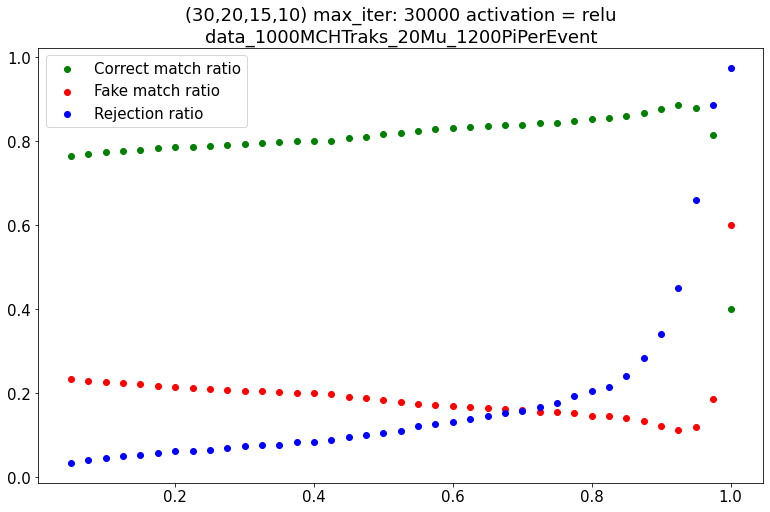

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [739. 738. 737. 737. 737. 737. 737. 737. 737. 736. 735. 735. 735. 734.
 733. 731. 730. 730. 730. 729. 724. 724. 722. 718. 714. 710. 706. 702.
 695. 684. 678. 670. 653. 621. 577. 487. 298.  92.  10.]
fake matches:  [227. 220. 216. 212. 209. 204. 201. 200. 197. 194. 191. 189. 187. 183.
 183. 181. 173. 170. 164. 160. 154. 150. 147. 144. 141. 137. 135. 130.
 128. 123. 116. 114. 107.  96.  81.  62.  41.  21.  15.]
no matches:  [ 34.  42.  47.  51.  54.  59.  62.  63.  66.  70.  74.  76.  78.  83.
  84.  88.  97. 100. 106. 111. 122. 126. 131. 138. 145. 153. 159. 168.
 177. 193. 206. 216. 240. 283. 342. 451. 661. 887. 975.]
Elapsed time benchmark ((30,20,15,10) max_iter: 30000 activation = relu) => 21.816573795993463 s


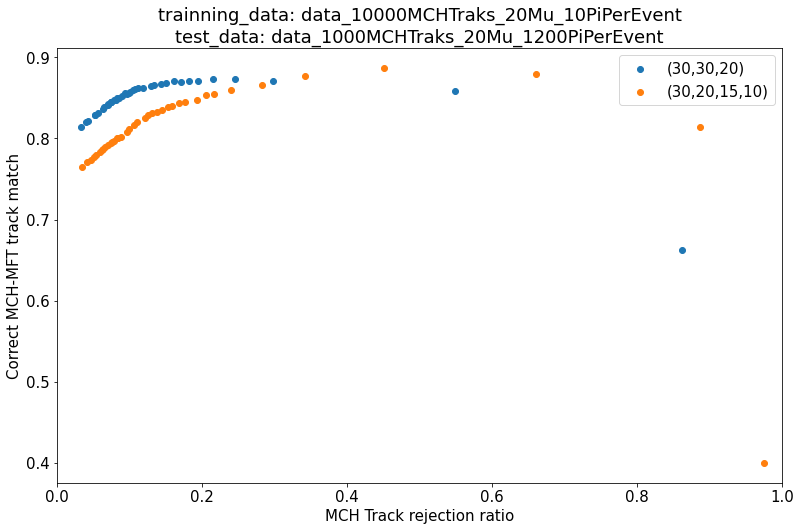

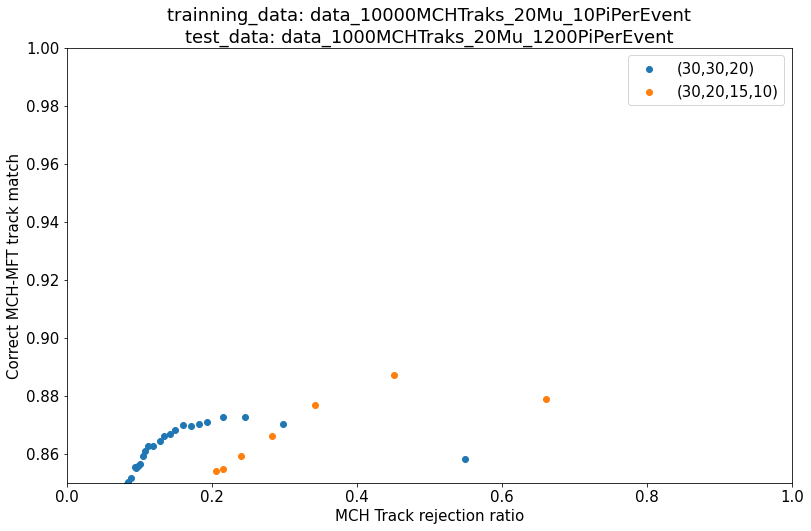

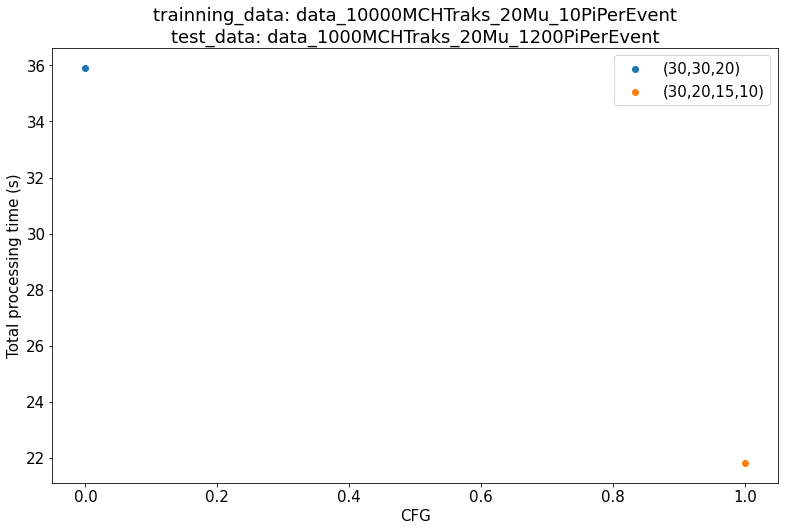

runBenchmarksMLPR completed on on 13 Nov 2020 16:51:30


In [2]:
trainning_data_file = "data_10000MCHTraks_20Mu_10PiPerEvent"
test_data_file = "data_1000MCHTraks_20Mu_1200PiPerEvent"


base_config = {
    'hidden_layers_cfg': (1,),
    'solver': 'adam',
    'max_iter': int(30000),
    'activation': 'relu',
    'trainning_data_file': trainning_data_file,
    'test_data_file': test_data_file
}

hidden_layers_configs = [(30,30,20),
                         (30,20,15,10),
                        ]

quick_test=True
quick_test=False
if(quick_test):
    base_config['max_iter'] = int(100)
    trainning_data_file = "data_1000MCHTraks_20Mu_10PiPerEvent"
    test_data_file = "data_1000MCHTraks_20Mu_200PiPerEvent"
    base_config['trainning_data_file'] = trainning_data_file
    base_config['test_data_file'] = test_data_file
    hidden_layers_configs = [(30,15,5),
                             (30,20,15)
                            ]


configurations = []

for hlcfg in hidden_layers_configs:
    config=base_config.copy()
    config['hidden_layers_cfg']=hlcfg
    configurations.append(config)

# Run Benchmark and results to results_list
results_list.append(runBenchmarksMLPR(configurations, trainning_data_file, test_data_file))


Starting benchmarks on 13 Nov 2020 16:51:30
Loading CSV from data_50000MCHTraks_20Mu_10PiPerEvent
Features...
Truth array...
MCH track ranges...
CSV loaded!
Loading CSV from data_1000MCHTraks_20Mu_1200PiPerEvent
Features...
Truth array...
MCH track ranges...
CSV loaded!
Starting benchmark: (30,30,20) max_iter: 30000 activation = relu on 13 Nov 2020 16:53:01
{'hidden_layers_cfg': (30, 30, 20), 'solver': 'adam', 'max_iter': 30000, 'activation': 'relu', 'trainning_data_file': 'data_50000MCHTraks_20Mu_10PiPerEvent', 'test_data_file': 'data_1000MCHTraks_20Mu_1200PiPerEvent'}
Trainning MLPRegressor on 13 Nov 2020 16:53:01
mlpr trainning time =  1.2637841850832046  minutes
Trainning Accuracy:  0.8577885554863817
Running MLPRegressor prediction...
Match_pred type: <class 'numpy.ndarray'>
Prediction accuracy:
 -0.23407719232160518
Summarizing results on 13 Nov 2020 16:54:19
Scores type: <class 'numpy.ndarray'>
[-0.00340321 -0.00340321 -0.00340321 ... -0.00340321 -0.00340321
 -0.00340321]


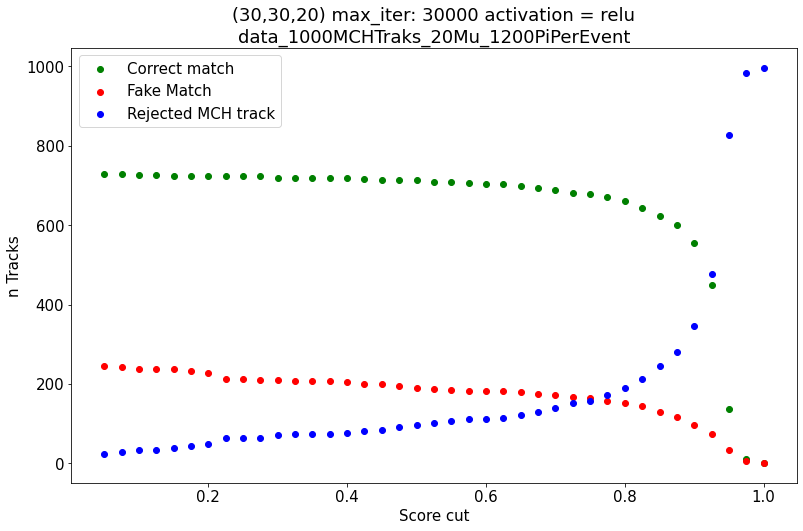

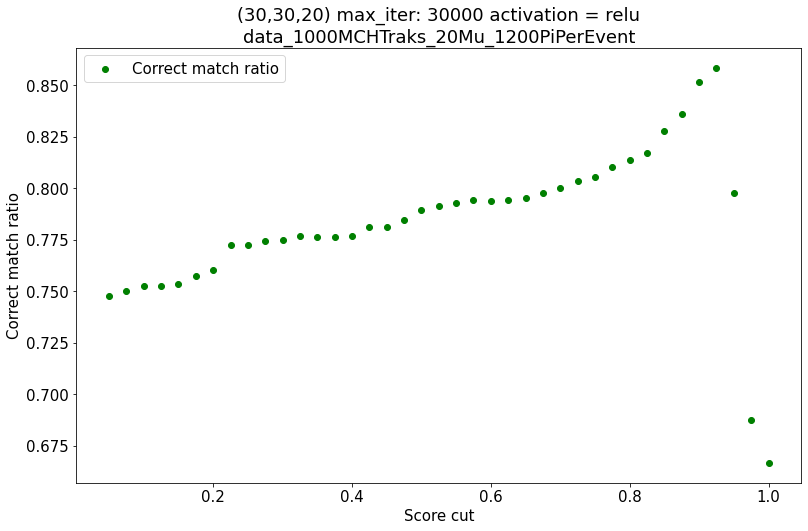

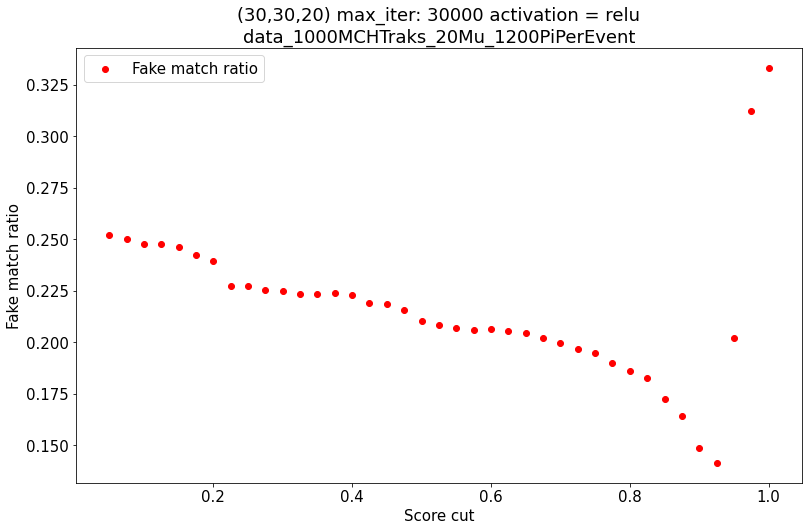

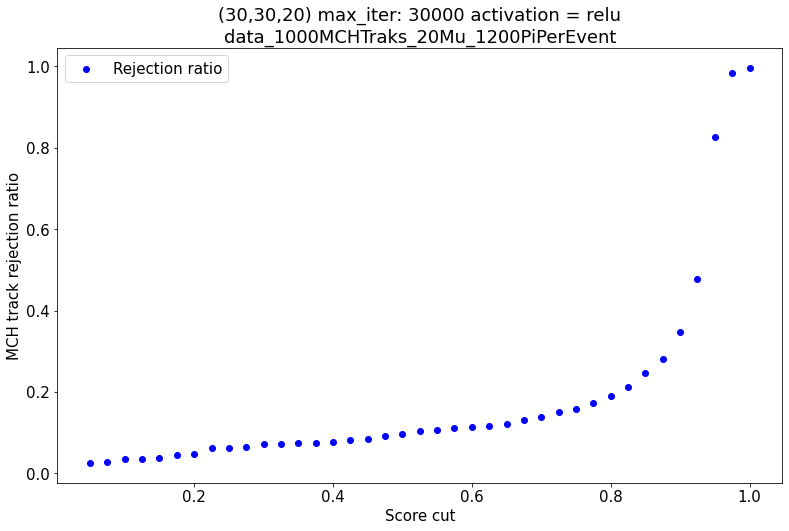

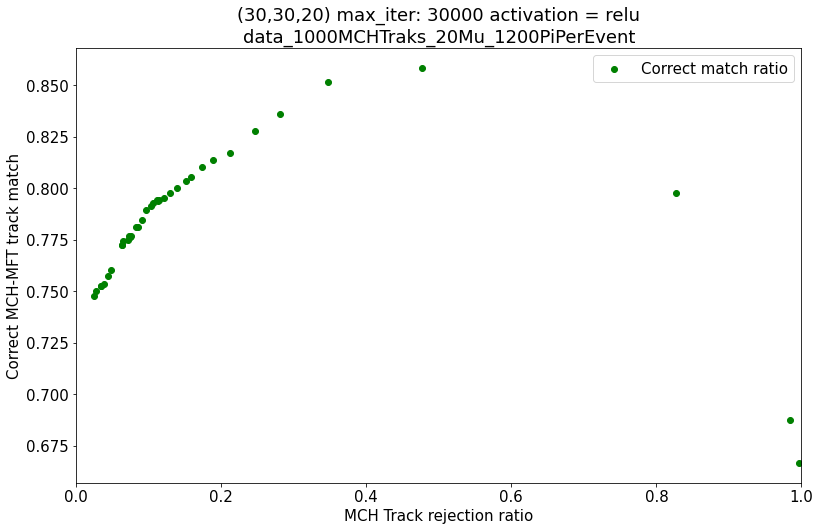

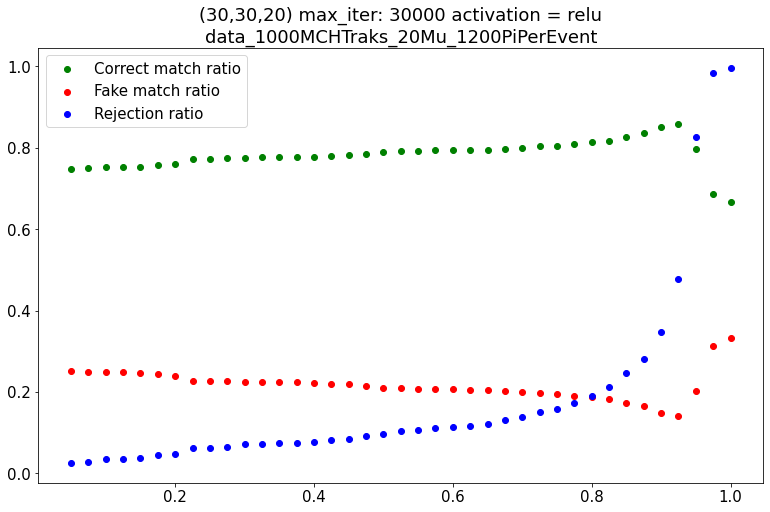

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [729. 729. 726. 726. 725. 724. 724. 724. 724. 724. 720. 720. 719. 718.
 718. 717. 715. 713. 713. 710. 709. 706. 704. 703. 699. 694. 689. 682.
 678. 670. 660. 644. 624. 601. 556. 449. 138.  11.   2.]
fake matches:  [246. 243. 239. 239. 237. 232. 228. 213. 213. 211. 209. 207. 207. 207.
 206. 201. 200. 196. 190. 187. 185. 183. 183. 182. 180. 176. 172. 167.
 164. 157. 151. 144. 130. 118.  97.  74.  35.   5.   1.]
no matches:  [ 25.  28.  35.  35.  38.  44.  48.  63.  63.  65.  71.  73.  74.  75.
  76.  82.  85.  91.  97. 103. 106. 111. 113. 115. 121. 130. 139. 151.
 158. 173. 189. 212. 246. 281. 347. 477. 827. 984. 997.]
Elapsed time benchmark ((30,30,20) max_iter: 30000 activation = relu) => 79.41061990200251 s
Starting benchmar

/home/alidocklite/alice/matching/piparamBackground/ml/ML_matcher_helpers.py:120: RuntimeWarning: invalid value encountered in true_divide
  correct_match_ratio = N_correct_matchArr/(N_correct_matchArr+N_fake_matchArr)
/home/alidocklite/alice/matching/piparamBackground/ml/ML_matcher_helpers.py:121: RuntimeWarning: invalid value encountered in true_divide
  fake_match_ratio = N_fake_matchArr/(N_correct_matchArr+N_fake_matchArr)


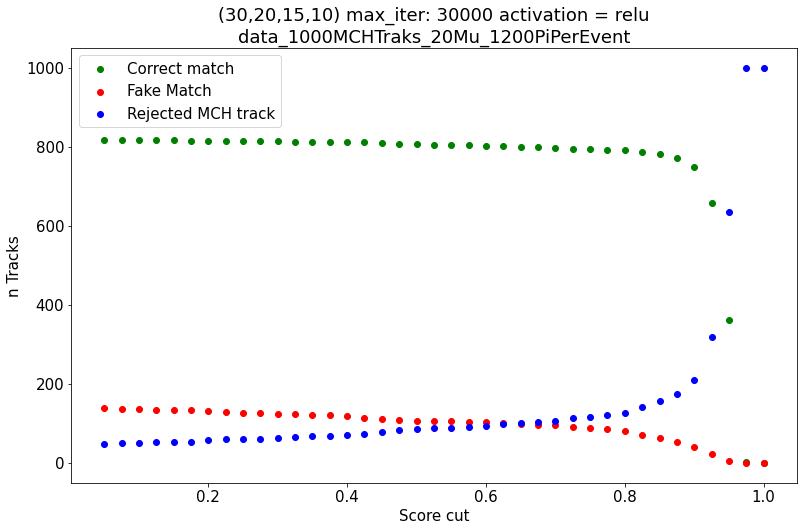

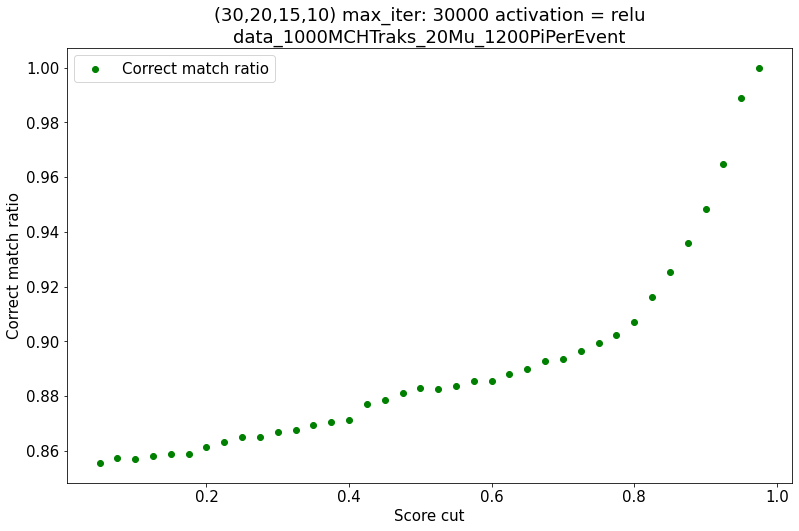

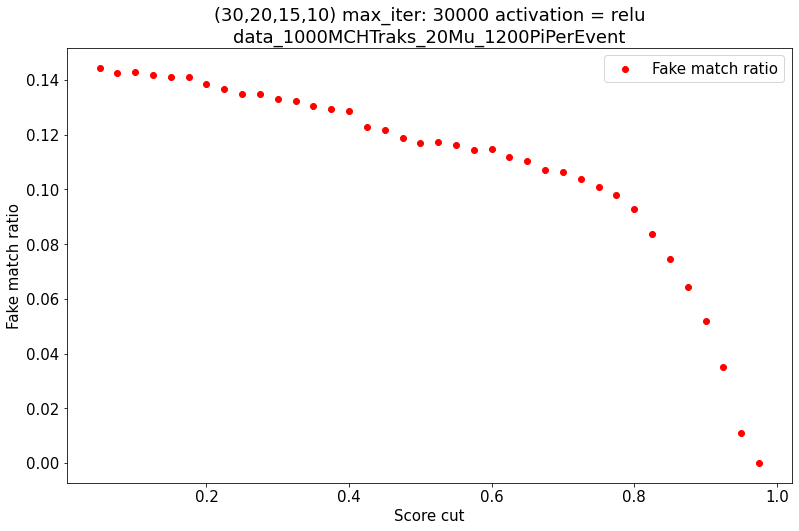

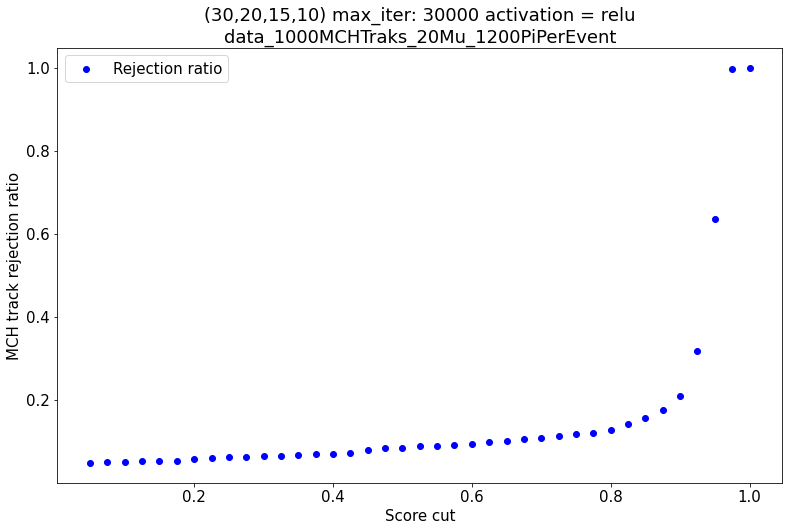

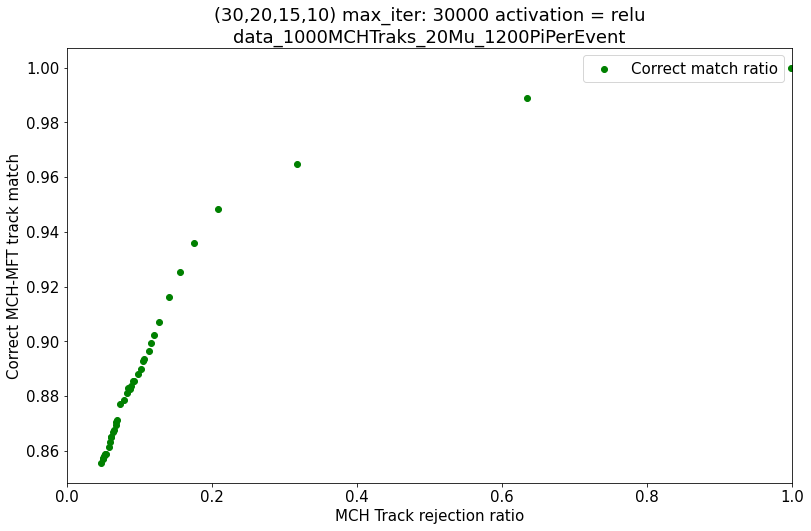

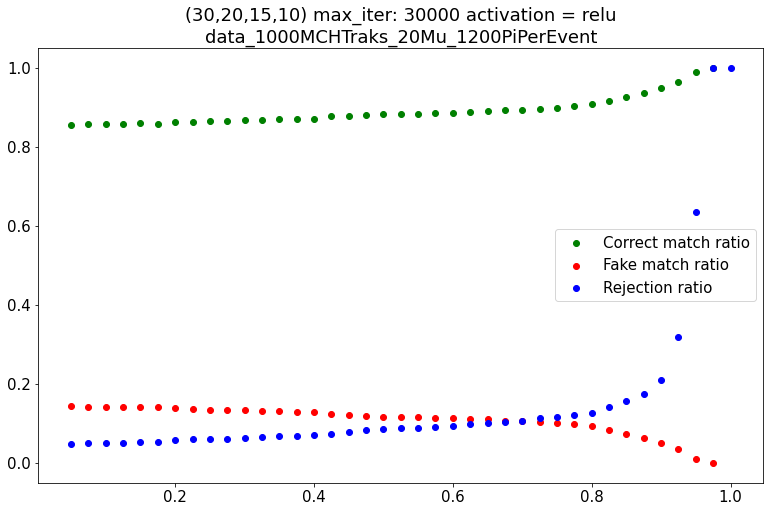

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [817. 817. 816. 816. 816. 815. 814. 814. 814. 814. 814. 813. 813. 813.
 813. 813. 809. 808. 808. 805. 805. 805. 803. 801. 799. 799. 798. 795.
 794. 793. 792. 787. 781. 772. 750. 658. 361.   2.   0.]
fake matches:  [138. 136. 136. 135. 134. 134. 131. 129. 127. 127. 125. 124. 122. 121.
 120. 114. 112. 109. 107. 107. 106. 104. 104. 101.  99.  96.  95.  92.
  89.  86.  81.  72.  63.  53.  41.  24.   4.   0.   0.]
no matches:  [  48.   50.   51.   52.   53.   54.   58.   60.   62.   62.   64.   66.
   68.   69.   70.   73.   79.   83.   85.   88.   89.   91.   93.   98.
  102.  105.  107.  113.  117.  121.  127.  141.  156.  175.  209.  318.
  635.  998. 1000.]
Elapsed time benchmark ((30,20,15,10) max_iter: 30000 activation = rel

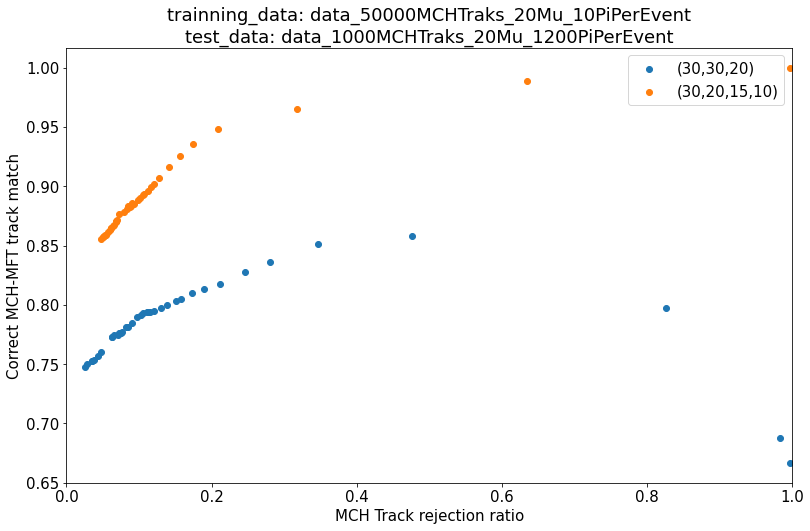

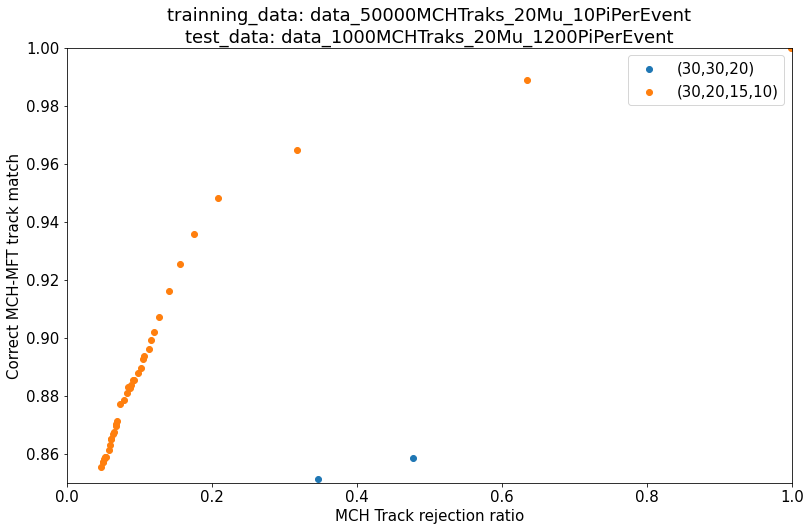

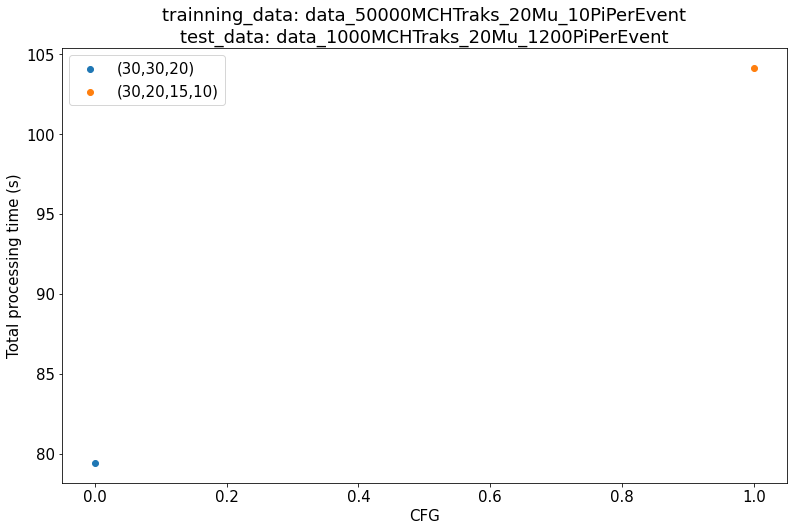

runBenchmarksMLPR completed on on 13 Nov 2020 16:56:05


In [3]:
trainning_data_file = "data_50000MCHTraks_20Mu_10PiPerEvent"
test_data_file = "data_1000MCHTraks_20Mu_1200PiPerEvent"


base_config = {
    'hidden_layers_cfg': (1,),
    'solver': 'adam',
    'max_iter': int(30000),
    'activation': 'relu',
    'trainning_data_file': trainning_data_file,
    'test_data_file': test_data_file
}

hidden_layers_configs = [(30,30,20),
                         (30,20,15,10),
                        ]
    
#quick_test=True
quick_test=False
if(quick_test):
    base_config['max_iter'] = int(100)
    trainning_data_file = "data_1000MCHTraks_20Mu_10PiPerEvent"
    test_data_file = "data_1000MCHTraks_20Mu_200PiPerEvent"
    base_config['trainning_data_file'] = trainning_data_file
    base_config['test_data_file'] = test_data_file
    hidden_layers_configs = [(30,15,5),
                             (30,20,15)
                            ]


configurations = []

for hlcfg in hidden_layers_configs:
    #print("Loop over hidden_layers_configs: setting", hlcfg)
    config=base_config.copy()
    config['hidden_layers_cfg']=hlcfg
    #print("Setting configuration: ", config)
    configurations.append(config)

# Run Benchmark and results to results_list
results_list.append(runBenchmarksMLPR(configurations, trainning_data_file, test_data_file))


Starting benchmarks on 13 Nov 2020 16:56:05
Loading CSV from data_50000MCHTraks_20Mu_10PiPerEvent
Features...
Truth array...
MCH track ranges...
CSV loaded!
Loading CSV from data_1000MCHTraks_20Mu_1200PiPerEvent
Features...
Truth array...
MCH track ranges...
CSV loaded!
Starting benchmark: (30,25,20,15,10,5) max_iter: 30000 activation = relu on 13 Nov 2020 16:57:38
{'hidden_layers_cfg': (30, 25, 20, 15, 10, 5), 'solver': 'adam', 'max_iter': 30000, 'activation': 'relu', 'trainning_data_file': 'data_50000MCHTraks_20Mu_10PiPerEvent', 'test_data_file': 'data_1000MCHTraks_20Mu_1200PiPerEvent'}
Trainning MLPRegressor on 13 Nov 2020 16:57:38
mlpr trainning time =  2.164660541016686  minutes
Trainning Accuracy:  0.9431036605427653
Running MLPRegressor prediction...
Match_pred type: <class 'numpy.ndarray'>
Prediction accuracy:
 -0.05324317771095033
Summarizing results on 13 Nov 2020 16:59:51
Scores type: <class 'numpy.ndarray'>
[0.00171545 0.00171545 0.00171545 ... 0.00171545 0.00171545 0.00171

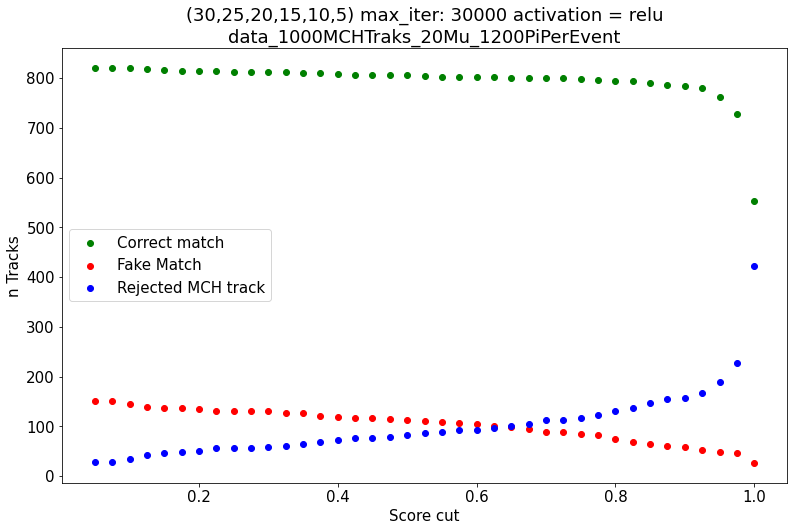

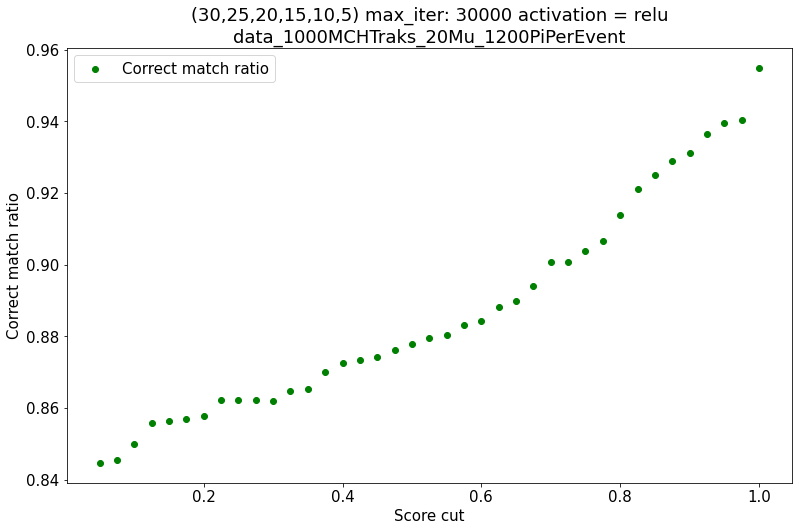

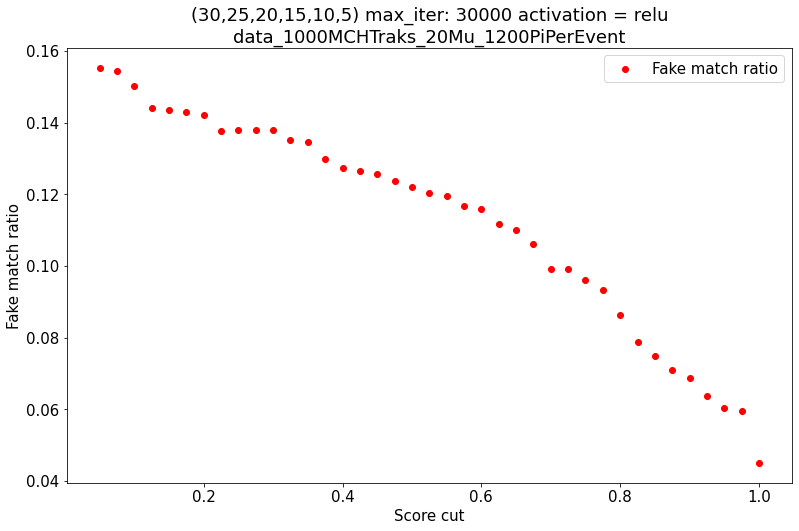

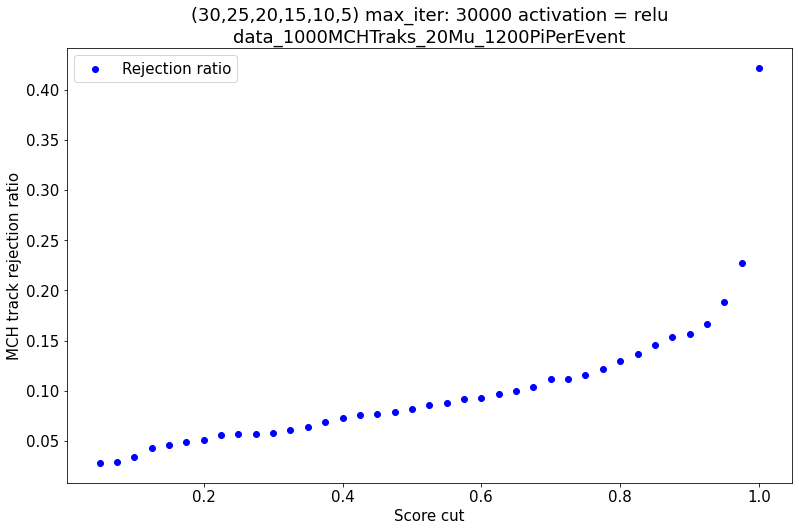

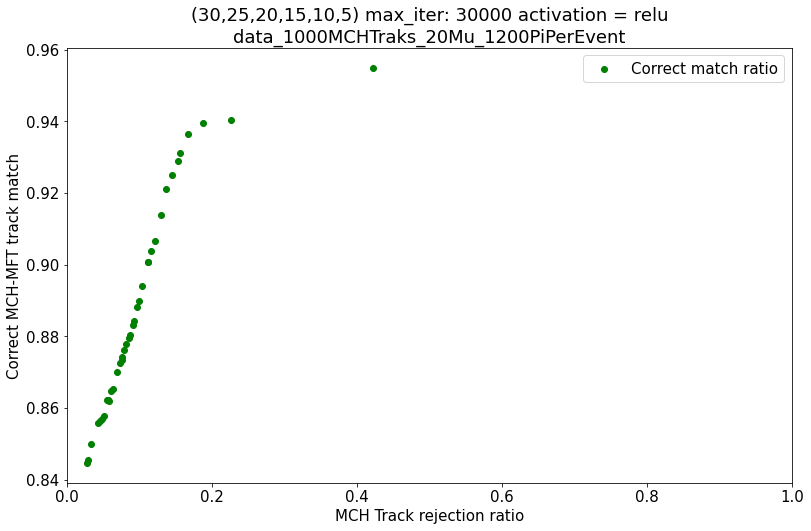

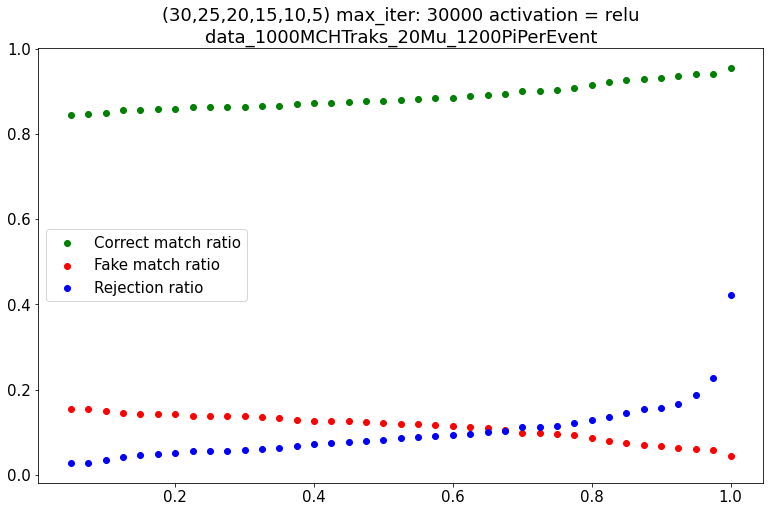

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [821. 821. 821. 819. 817. 815. 814. 814. 813. 813. 812. 812. 810. 810.
 809. 807. 807. 807. 806. 804. 803. 802. 802. 802. 801. 801. 800. 800.
 799. 796. 795. 795. 790. 786. 785. 780. 763. 727. 552.]
fake matches:  [151. 150. 145. 138. 137. 136. 135. 130. 130. 130. 130. 127. 126. 121.
 118. 117. 116. 114. 112. 110. 109. 106. 105. 101.  99.  95.  88.  88.
  85.  82.  75.  68.  64.  60.  58.  53.  49.  46.  26.]
no matches:  [ 28.  29.  34.  43.  46.  49.  51.  56.  57.  57.  58.  61.  64.  69.
  73.  76.  77.  79.  82.  86.  88.  92.  93.  97. 100. 104. 112. 112.
 116. 122. 130. 137. 146. 154. 157. 167. 188. 227. 422.]
Elapsed time benchmark ((30,25,20,15,10,5) max_iter: 30000 activation = relu) => 134.5051536379906 s
Starting 

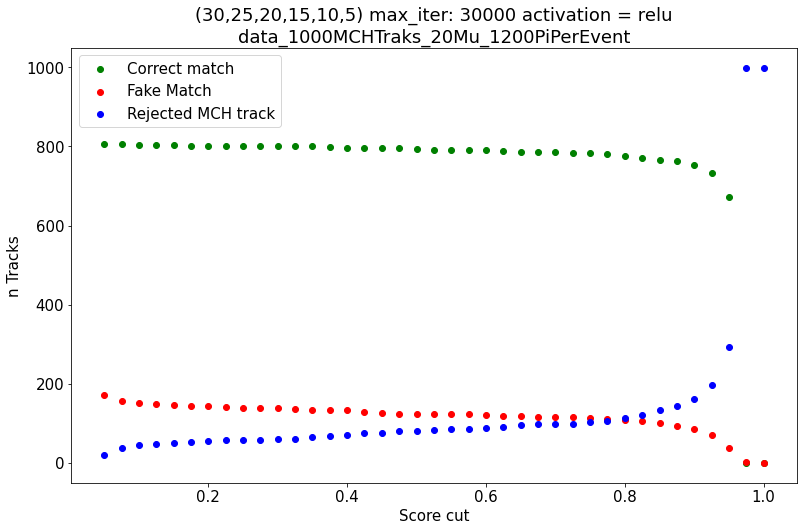

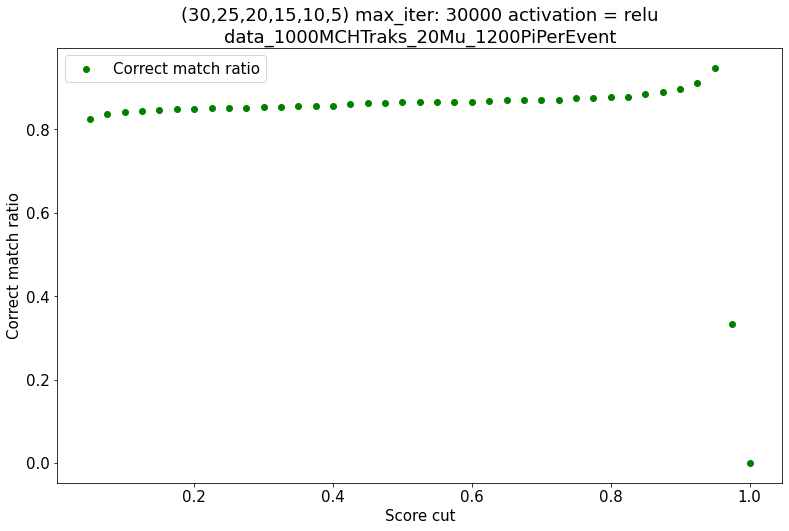

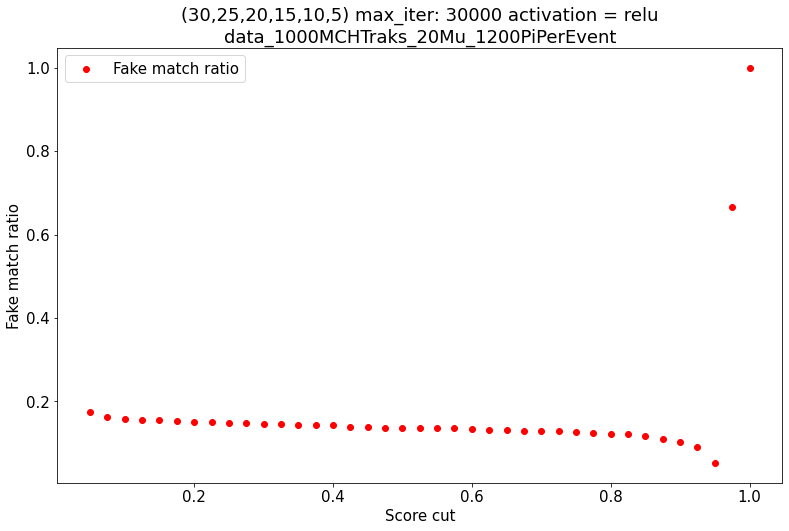

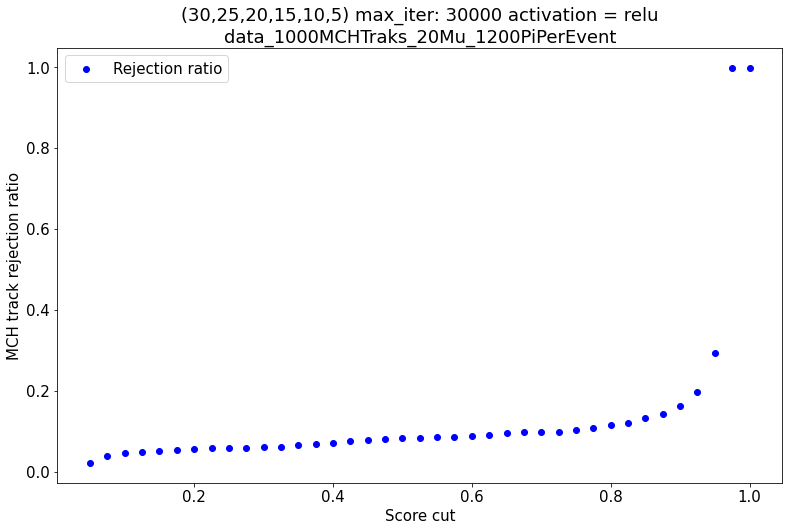

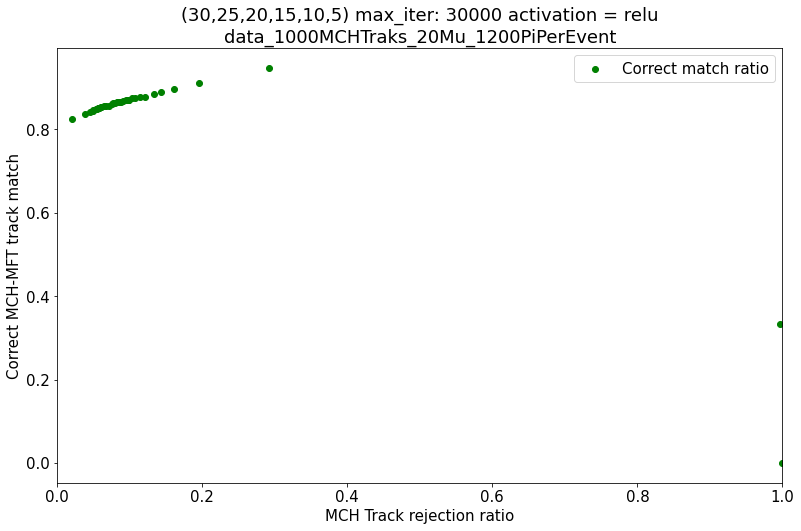

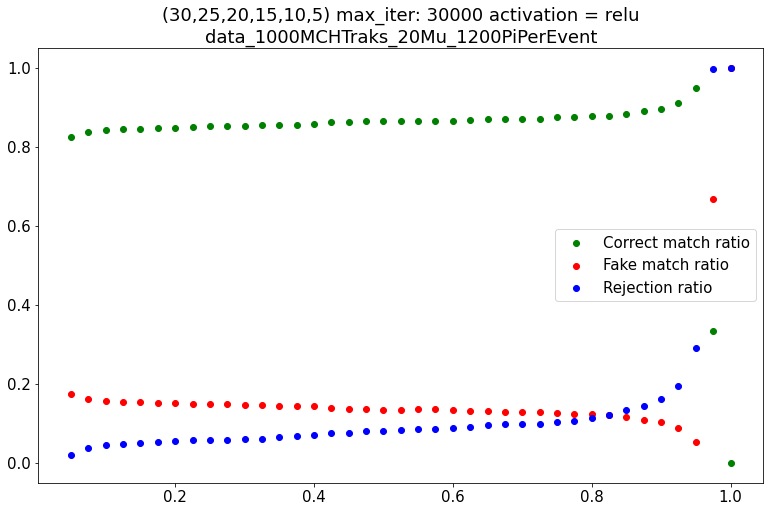

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [807. 805. 804. 803. 803. 802. 802. 802. 802. 802. 802. 802. 800. 798.
 796. 796. 796. 795. 794. 792. 791. 790. 790. 789. 787. 785. 785. 784.
 784. 782. 777. 772. 766. 763. 752. 732. 671.   1.   0.]
fake matches:  [172. 157. 151. 148. 147. 144. 143. 141. 140. 140. 138. 137. 135. 134.
 133. 128. 127. 125. 124. 124. 124. 124. 122. 120. 118. 117. 117. 117.
 113. 111. 109. 107. 101.  94.  87.  72.  37.   2.   1.]
no matches:  [ 21.  38.  45.  49.  50.  54.  55.  57.  58.  58.  60.  61.  65.  68.
  71.  76.  77.  80.  82.  84.  85.  86.  88.  91.  95.  98.  98.  99.
 103. 107. 114. 121. 133. 143. 161. 196. 292. 997. 999.]
Elapsed time benchmark ((30,25,20,15,10,5) max_iter: 30000 activation = relu) => 128.07558791700285 s
Starting

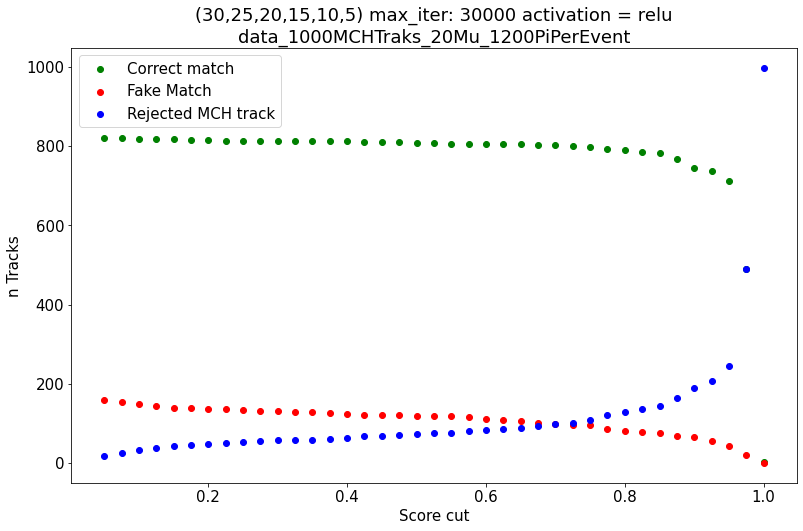

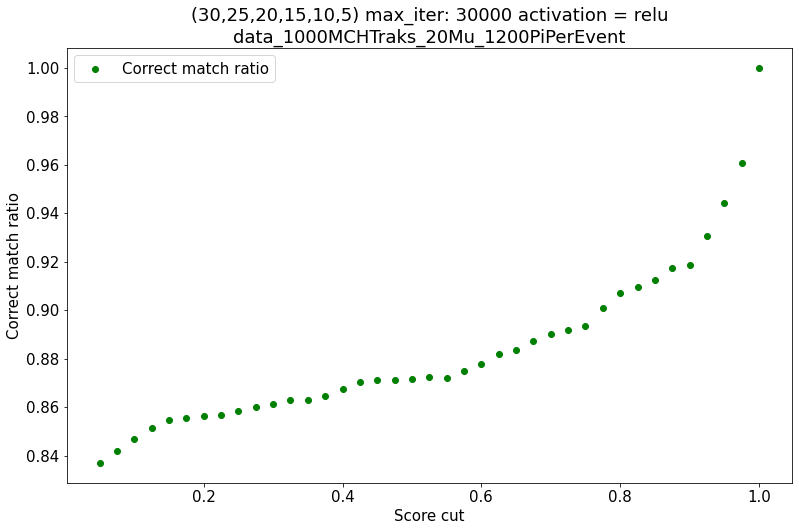

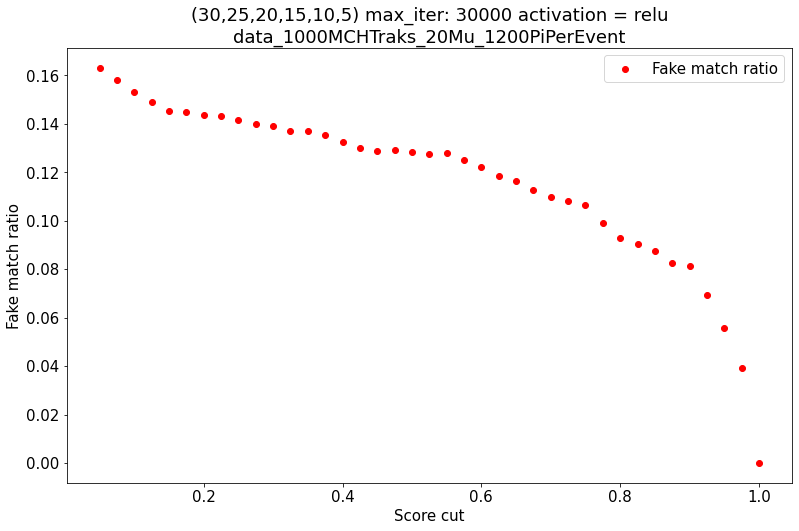

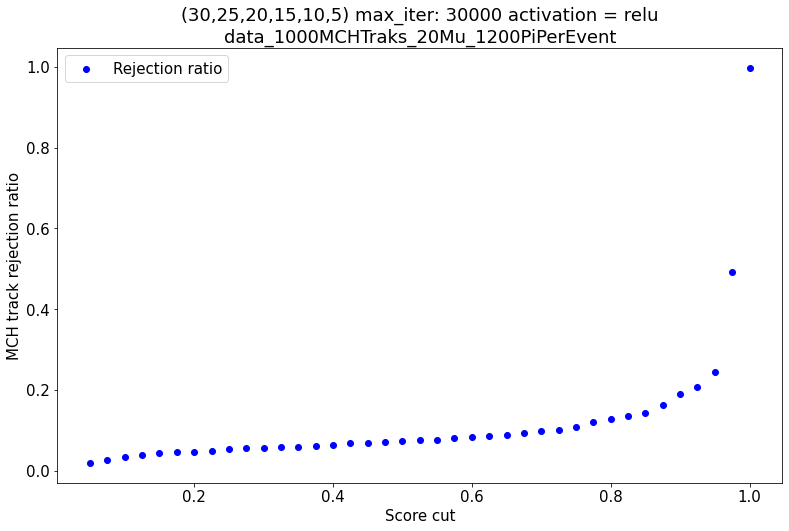

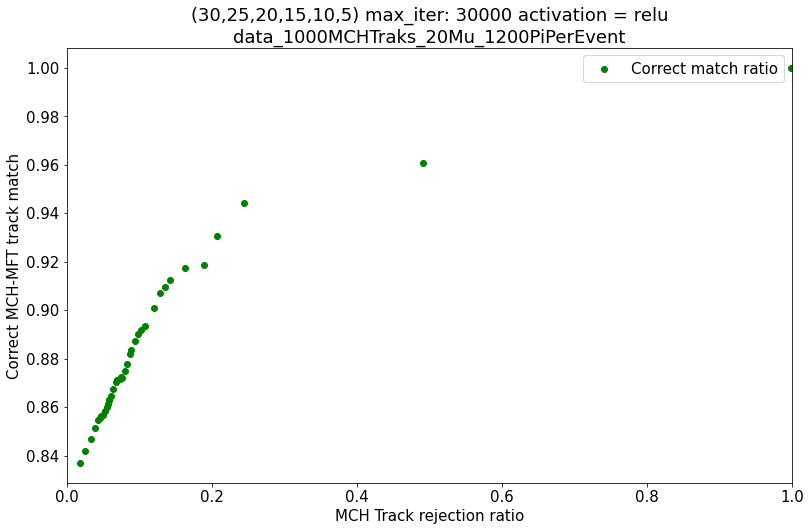

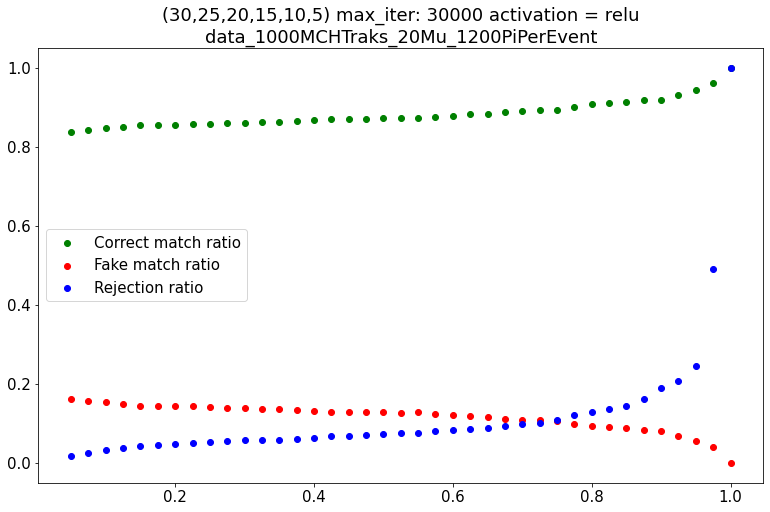

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [821. 820. 818. 818. 818. 816. 816. 814. 813. 812. 812. 812. 812. 812.
 812. 811. 811. 810. 807. 807. 805. 805. 805. 805. 805. 804. 803. 801.
 797. 792. 790. 786. 782. 768. 745. 737. 713. 489.   2.]
fake matches:  [160. 154. 148. 143. 139. 138. 137. 136. 134. 132. 131. 129. 129. 127.
 124. 121. 120. 120. 119. 118. 118. 115. 112. 108. 106. 102.  99.  97.
  95.  87.  81.  78.  75.  69.  66.  55.  42.  20.   0.]
no matches:  [ 19.  26.  34.  39.  43.  46.  47.  50.  53.  56.  57.  59.  59.  61.
  64.  68.  69.  70.  74.  75.  77.  80.  83.  87.  89.  94.  98. 102.
 108. 121. 129. 136. 143. 163. 189. 208. 245. 491. 998.]
Elapsed time benchmark ((30,25,20,15,10,5) max_iter: 30000 activation = relu) => 132.61564903199906 s


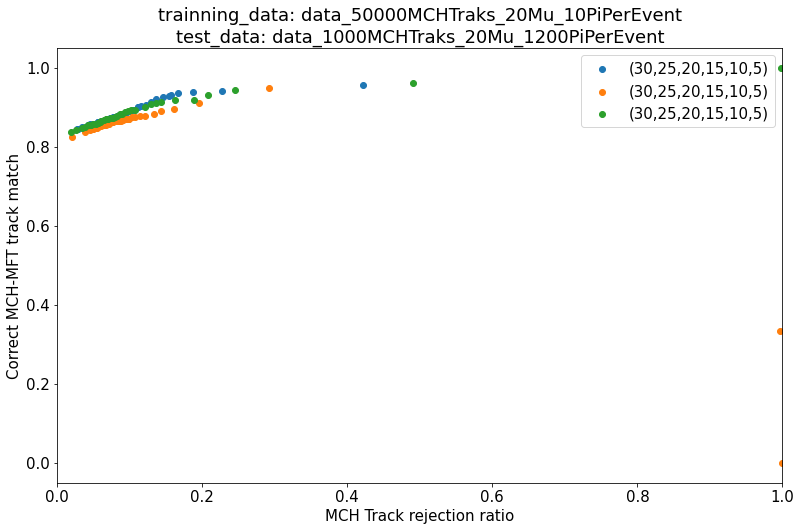

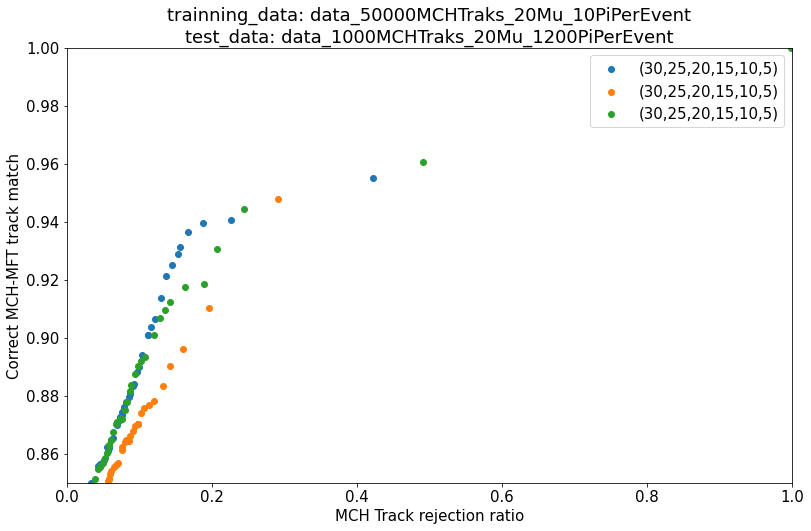

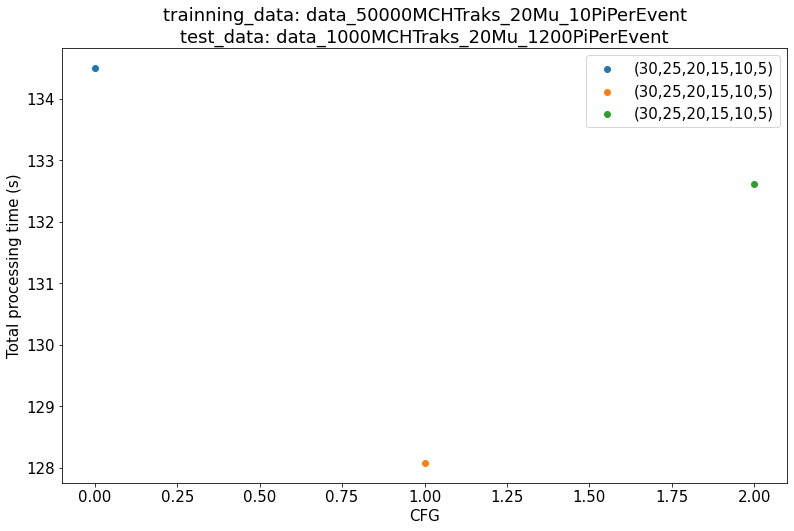

runBenchmarksMLPR completed on on 13 Nov 2020 17:04:13


In [4]:
trainning_data_file = "data_50000MCHTraks_20Mu_10PiPerEvent"
test_data_file = "data_1000MCHTraks_20Mu_1200PiPerEvent"


base_config = {
    'hidden_layers_cfg': (1,),
    'solver': 'adam',
    'max_iter': int(30000),
    'activation': 'relu',
    'trainning_data_file': trainning_data_file,
    'test_data_file': test_data_file
}

hidden_layers_configs = [(30,25,20,15,10,5),
                         (30,25,20,15,10,5),
                         (30,25,20,15,10,5)
                        ]
    
#quick_test=True
quick_test=False
if(quick_test):
    base_config['max_iter'] = int(100)
    trainning_data_file = "data_1000MCHTraks_20Mu_10PiPerEvent"
    test_data_file = "data_1000MCHTraks_20Mu_200PiPerEvent"
    base_config['trainning_data_file'] = trainning_data_file
    base_config['test_data_file'] = test_data_file
    hidden_layers_configs = [(30,15,5),
                             (30,20,15)
                            ]


configurations = []

for hlcfg in hidden_layers_configs:
    #print("Loop over hidden_layers_configs: setting", hlcfg)
    config=base_config.copy()
    config['hidden_layers_cfg']=hlcfg
    #print("Setting configuration: ", config)
    configurations.append(config)

# Run Benchmark and results to results_list
results_list.append(runBenchmarksMLPR(configurations, trainning_data_file, test_data_file))


Starting benchmarks on 13 Nov 2020 17:04:13
Loading CSV from data_50000MCHTraks_20Mu_10PiPerEvent
Features...
Truth array...
MCH track ranges...
CSV loaded!
Loading CSV from data_1000MCHTraks_20Mu_1200PiPerEvent
Features...
Truth array...
MCH track ranges...
CSV loaded!
Starting benchmark: (30,30,20) max_iter: 30000 activation = relu on 13 Nov 2020 17:05:45
{'hidden_layers_cfg': (30, 30, 20), 'solver': 'adam', 'max_iter': 30000, 'activation': 'relu', 'trainning_data_file': 'data_50000MCHTraks_20Mu_10PiPerEvent', 'test_data_file': 'data_1000MCHTraks_20Mu_1200PiPerEvent'}
Trainning MLPRegressor on 13 Nov 2020 17:05:45
mlpr trainning time =  1.6449319407334164  minutes
Trainning Accuracy:  0.9410874126515478
Running MLPRegressor prediction...
Match_pred type: <class 'numpy.ndarray'>
Prediction accuracy:
 0.5197573961400976
Summarizing results on 13 Nov 2020 17:07:26
Scores type: <class 'numpy.ndarray'>
[0.00021509 0.00021509 0.00021509 ... 0.00021509 0.00021509 0.00021509]


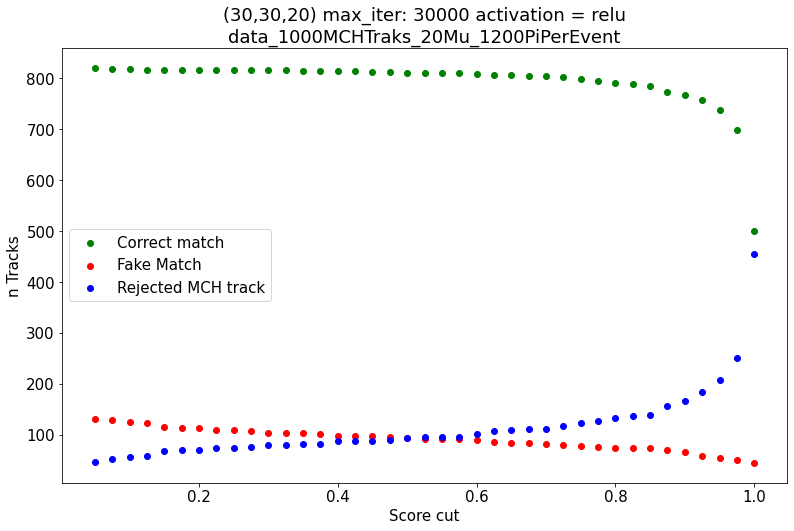

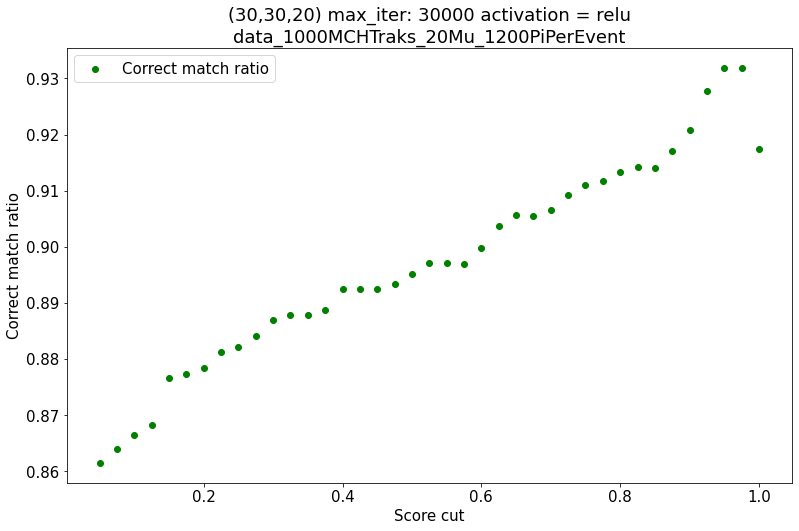

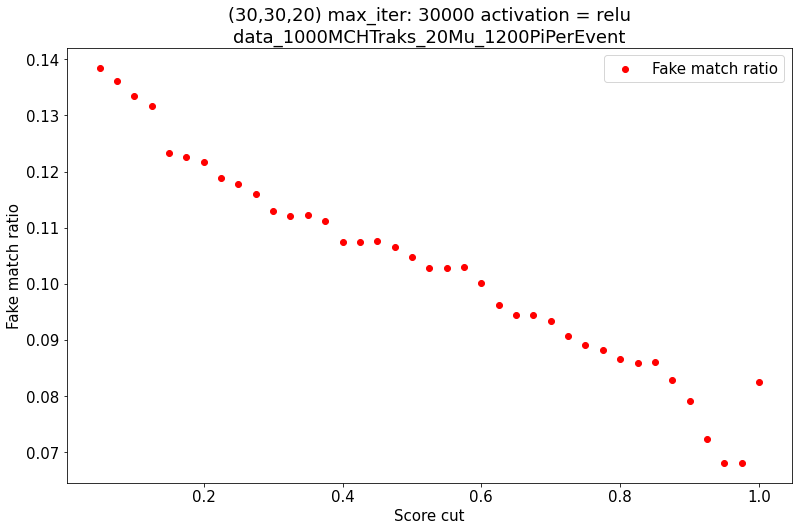

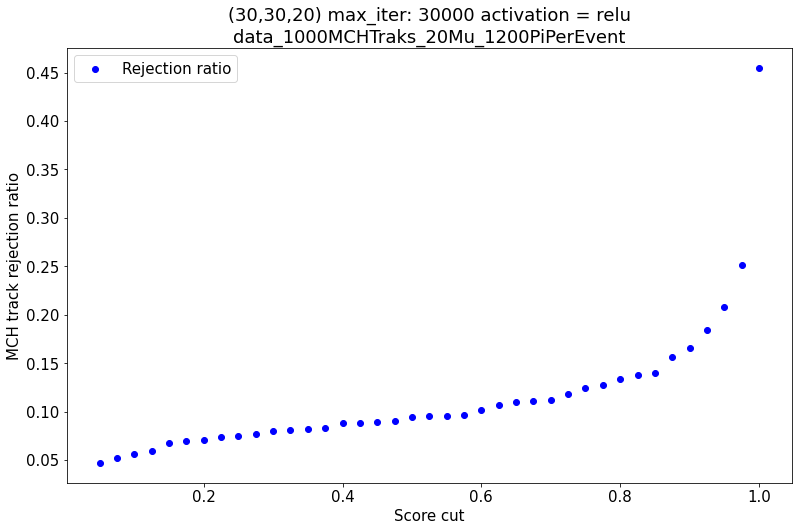

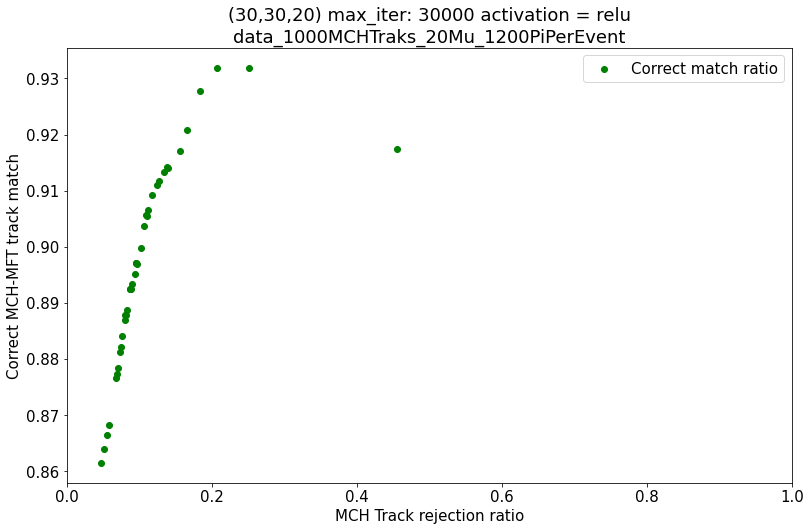

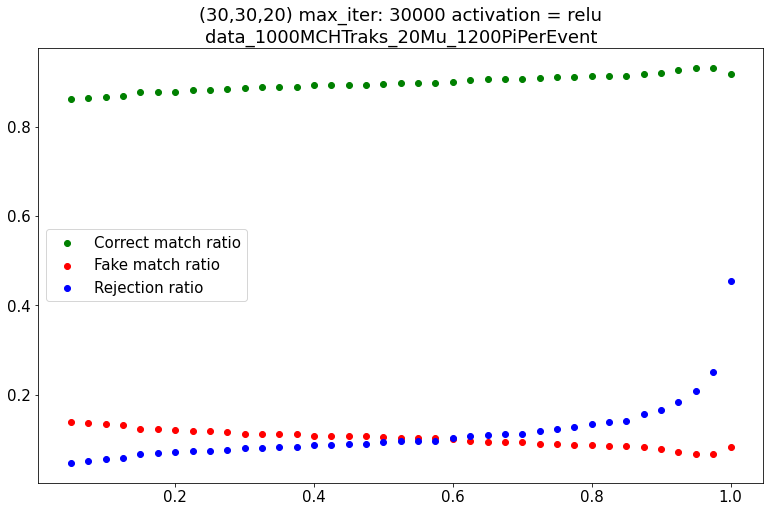

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [821. 819. 818. 817. 817. 816. 816. 816. 816. 816. 816. 816. 815. 815.
 814. 814. 813. 813. 811. 811. 811. 810. 808. 807. 806. 805. 805. 802.
 798. 795. 791. 788. 786. 774. 768. 757. 738. 698. 500.]
fake matches:  [132. 129. 126. 124. 115. 114. 113. 110. 109. 107. 104. 103. 103. 102.
  98.  98.  98.  97.  95.  93.  93.  93.  90.  86.  84.  84.  83.  80.
  78.  77.  75.  74.  74.  70.  66.  59.  54.  51.  45.]
no matches:  [ 47.  52.  56.  59.  68.  70.  71.  74.  75.  77.  80.  81.  82.  83.
  88.  88.  89.  90.  94.  96.  96.  97. 102. 107. 110. 111. 112. 118.
 124. 128. 134. 138. 140. 156. 166. 184. 208. 251. 455.]
Elapsed time benchmark ((30,30,20) max_iter: 30000 activation = relu) => 102.30856225499883 s
Starting benchma

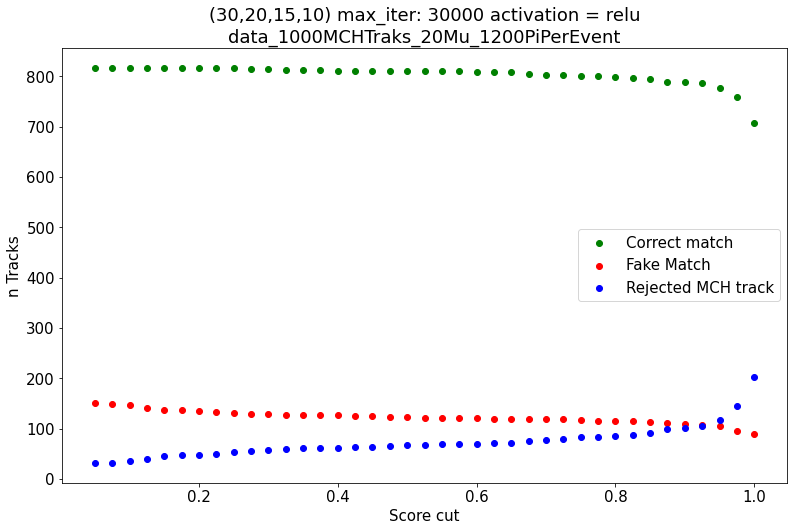

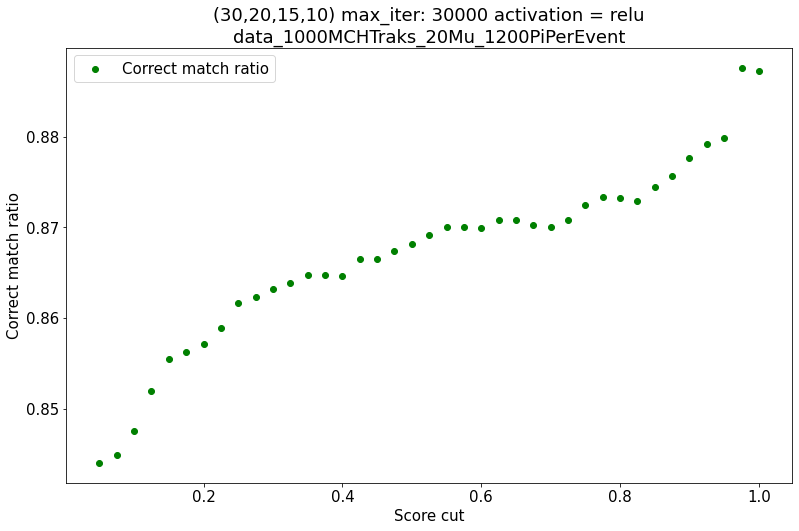

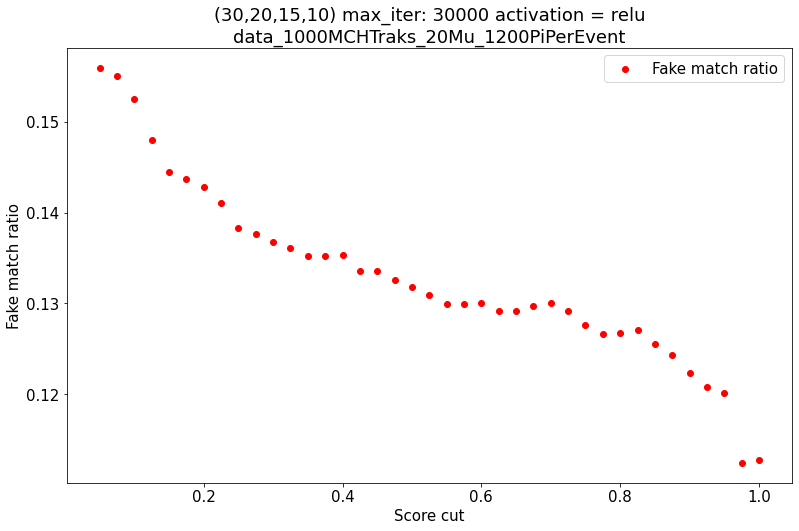

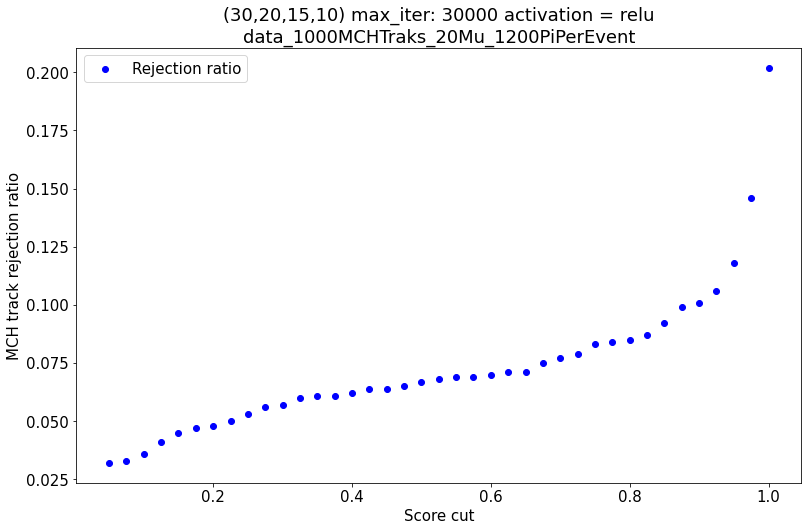

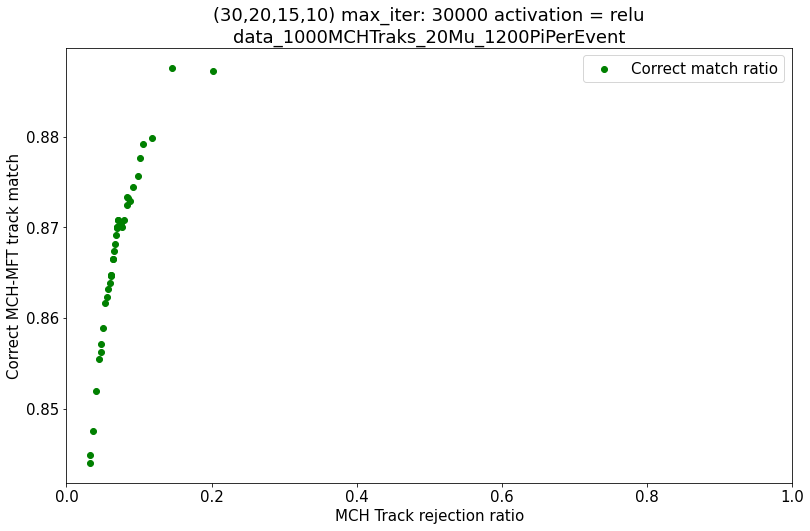

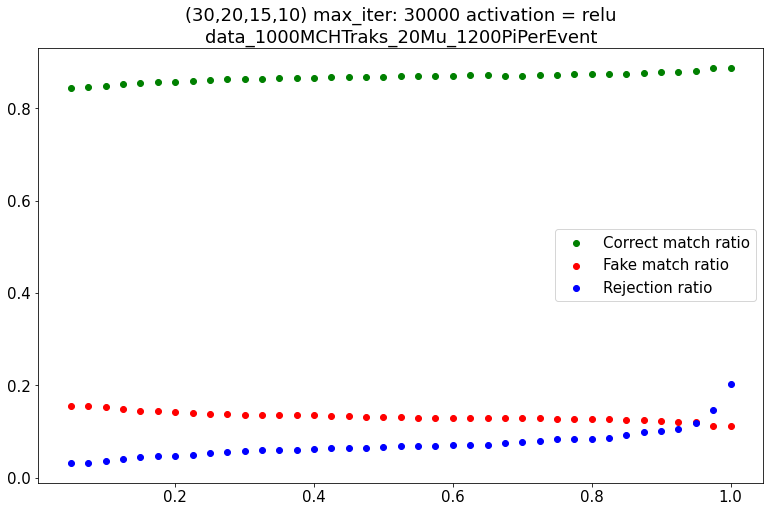

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [817. 817. 817. 817. 817. 816. 816. 816. 816. 814. 814. 812. 812. 812.
 811. 811. 811. 811. 810. 810. 810. 810. 809. 809. 809. 805. 803. 802.
 800. 800. 799. 797. 794. 789. 789. 786. 776. 758. 708.]
fake matches:  [151. 150. 147. 142. 138. 137. 136. 134. 131. 130. 129. 128. 127. 127.
 127. 125. 125. 124. 123. 122. 121. 121. 121. 120. 120. 120. 120. 119.
 117. 116. 116. 116. 114. 112. 110. 108. 106.  96.  90.]
no matches:  [ 32.  33.  36.  41.  45.  47.  48.  50.  53.  56.  57.  60.  61.  61.
  62.  64.  64.  65.  67.  68.  69.  69.  70.  71.  71.  75.  77.  79.
  83.  84.  85.  87.  92.  99. 101. 106. 118. 146. 202.]
Elapsed time benchmark ((30,20,15,10) max_iter: 30000 activation = relu) => 111.7696108139935 s
Starting bench

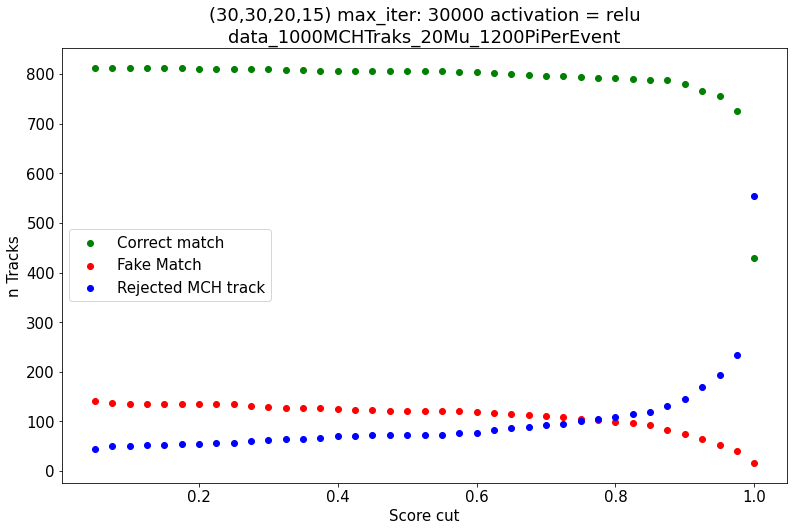

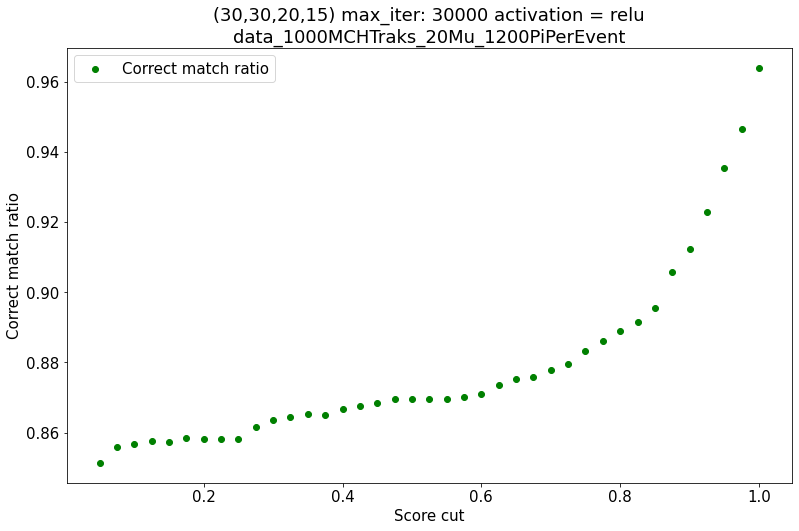

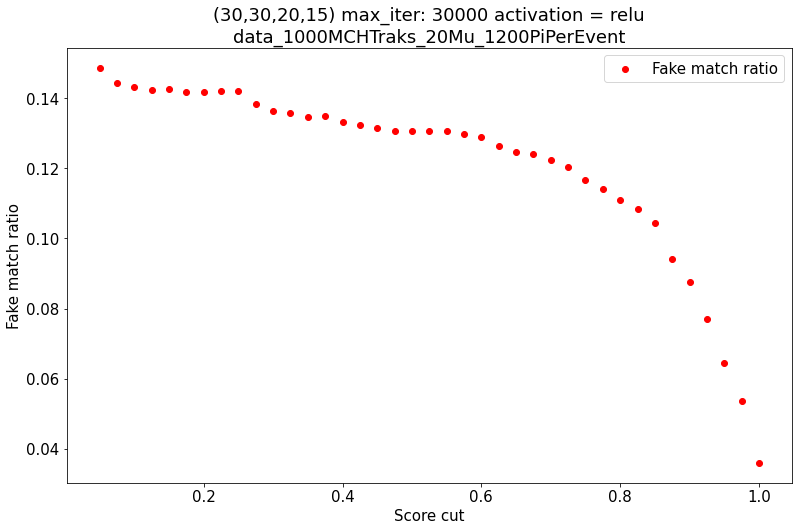

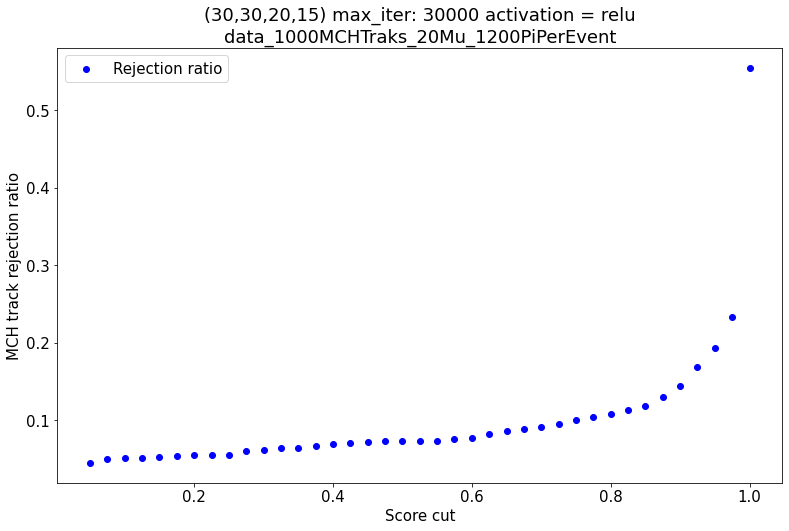

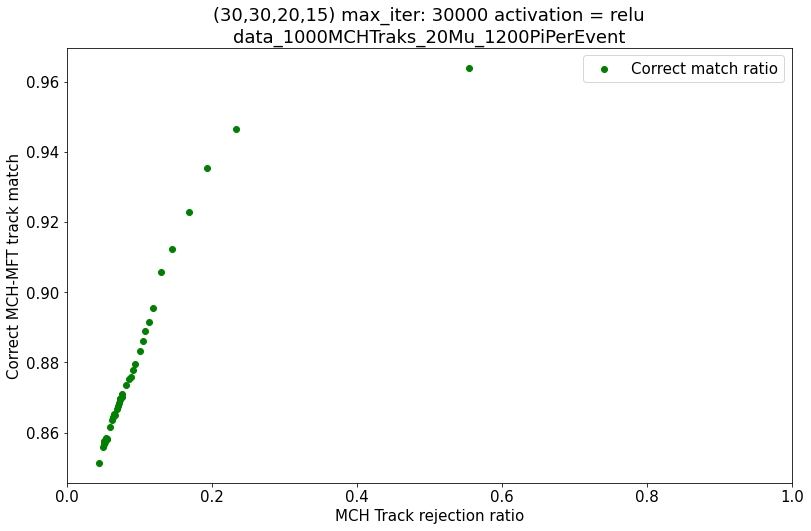

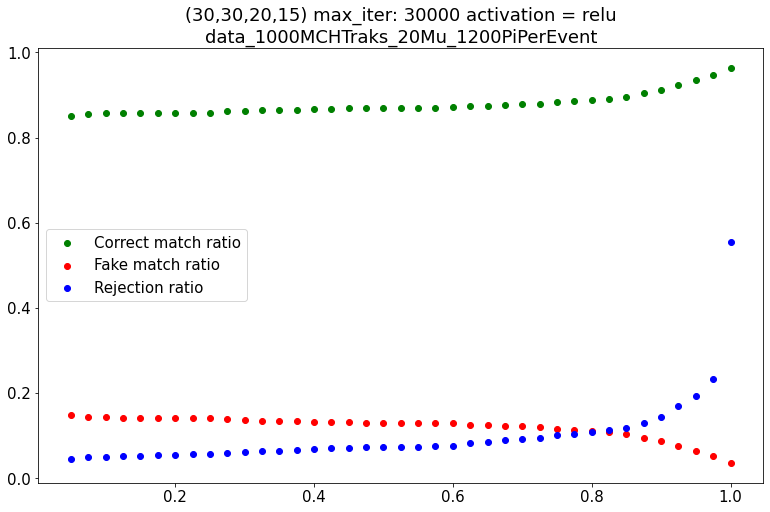

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [813. 813. 813. 813. 812. 812. 811. 810. 810. 810. 810. 809. 809. 807.
 806. 806. 806. 806. 806. 806. 806. 804. 804. 802. 800. 798. 797. 796.
 794. 793. 793. 790. 789. 788. 780. 767. 755. 725. 429.]
fake matches:  [142. 137. 136. 135. 135. 134. 134. 134. 134. 130. 128. 127. 126. 126.
 124. 123. 122. 121. 121. 121. 121. 120. 119. 116. 114. 113. 111. 109.
 105. 102.  99.  96.  92.  82.  75.  64.  52.  41.  16.]
no matches:  [ 45.  50.  51.  52.  53.  54.  55.  56.  56.  60.  62.  64.  65.  67.
  70.  71.  72.  73.  73.  73.  73.  76.  77.  82.  86.  89.  92.  95.
 101. 105. 108. 114. 119. 130. 145. 169. 193. 234. 555.]
Elapsed time benchmark ((30,30,20,15) max_iter: 30000 activation = relu) => 116.73929143600981 s
Starting benc

/home/alidocklite/alice/matching/piparamBackground/ml/ML_matcher_helpers.py:120: RuntimeWarning: invalid value encountered in true_divide
  correct_match_ratio = N_correct_matchArr/(N_correct_matchArr+N_fake_matchArr)
/home/alidocklite/alice/matching/piparamBackground/ml/ML_matcher_helpers.py:121: RuntimeWarning: invalid value encountered in true_divide
  fake_match_ratio = N_fake_matchArr/(N_correct_matchArr+N_fake_matchArr)


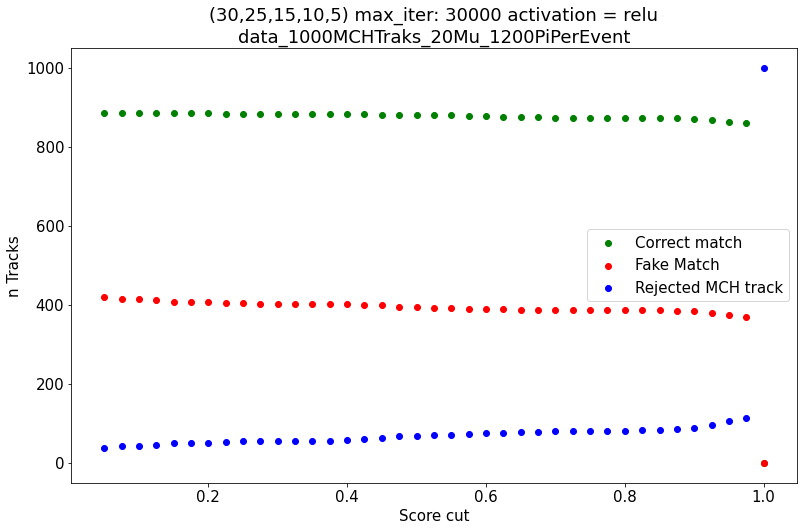

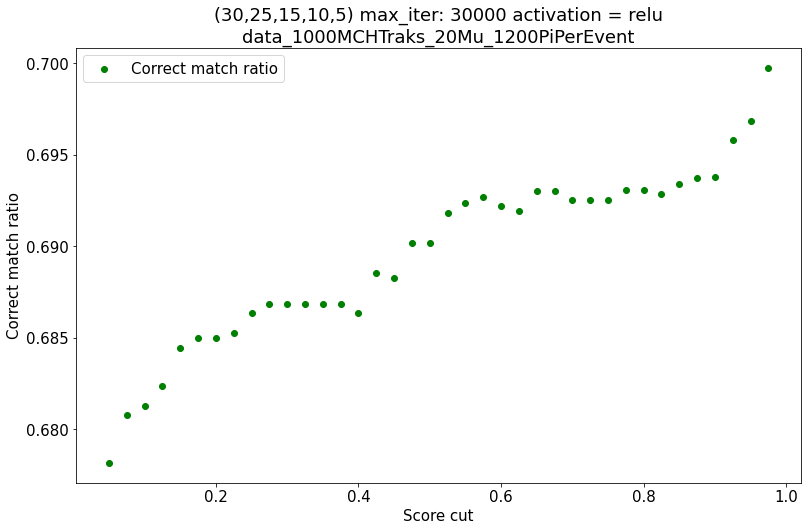

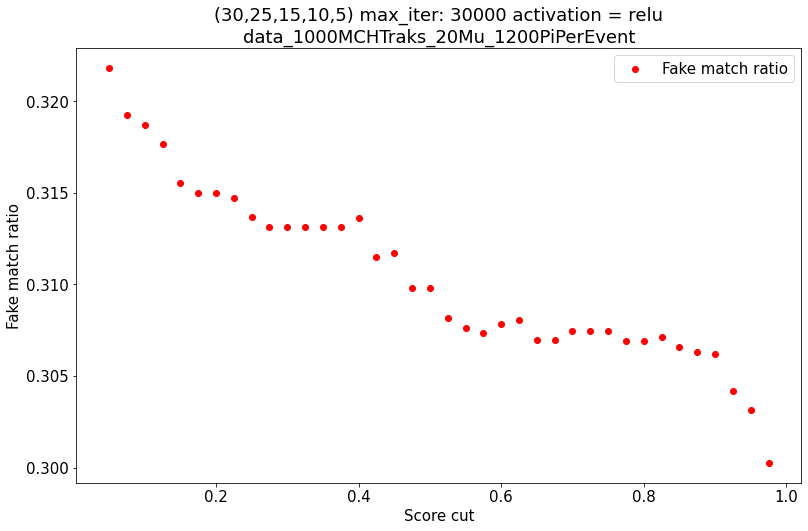

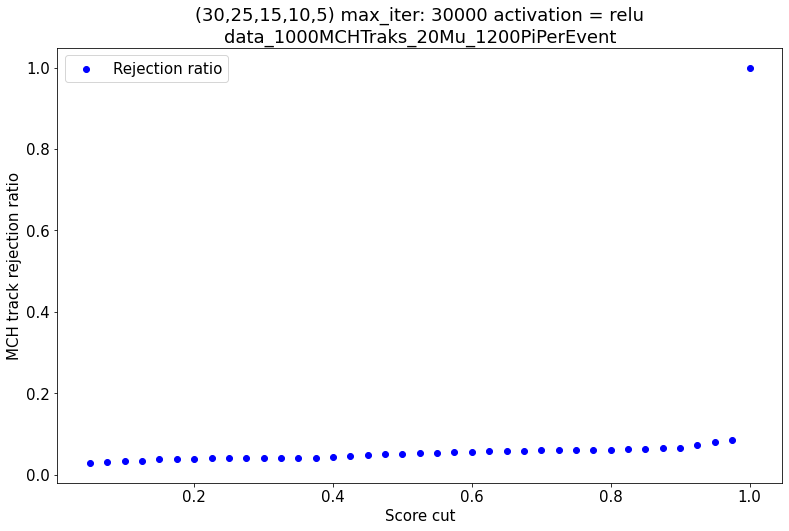

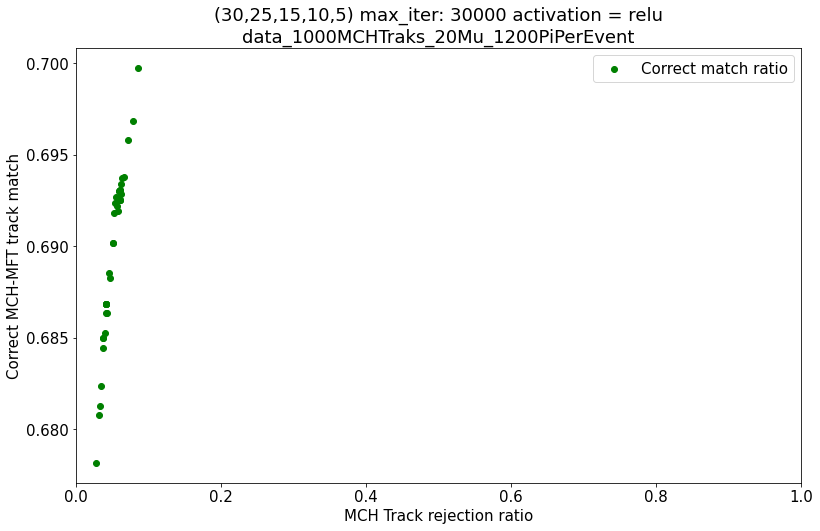

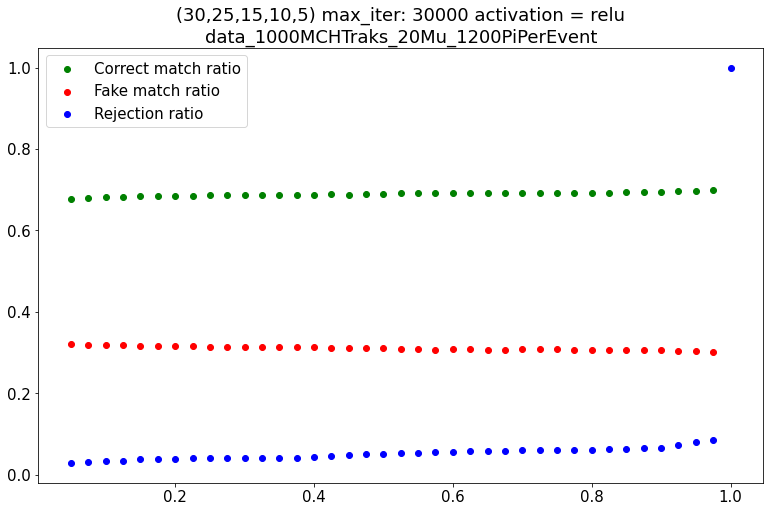

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [885. 885. 885. 885. 885. 885. 885. 884. 884. 884. 884. 884. 884. 884.
 882. 882. 881. 880. 880. 880. 880. 879. 877. 876. 876. 876. 874. 874.
 874. 874. 874. 873. 873. 872. 870. 867. 862. 860.   0.]
fake matches:  [420. 415. 414. 412. 408. 407. 407. 406. 404. 403. 403. 403. 403. 403.
 403. 399. 399. 395. 395. 392. 391. 390. 390. 390. 388. 388. 388. 388.
 388. 387. 387. 387. 386. 385. 384. 379. 375. 369.   0.]
no matches:  [  38.   43.   44.   46.   50.   51.   51.   53.   55.   56.   56.   56.
   56.   56.   58.   62.   63.   68.   68.   71.   72.   74.   76.   77.
   79.   79.   81.   81.   81.   82.   82.   83.   84.   86.   89.   97.
  106.  114. 1000.]
Elapsed time benchmark ((30,25,15,10,5) max_iter: 30000 activation = r

/home/alidocklite/alice/matching/piparamBackground/ml/ML_matcher_helpers.py:120: RuntimeWarning: invalid value encountered in true_divide
  correct_match_ratio = N_correct_matchArr/(N_correct_matchArr+N_fake_matchArr)
/home/alidocklite/alice/matching/piparamBackground/ml/ML_matcher_helpers.py:121: RuntimeWarning: invalid value encountered in true_divide
  fake_match_ratio = N_fake_matchArr/(N_correct_matchArr+N_fake_matchArr)


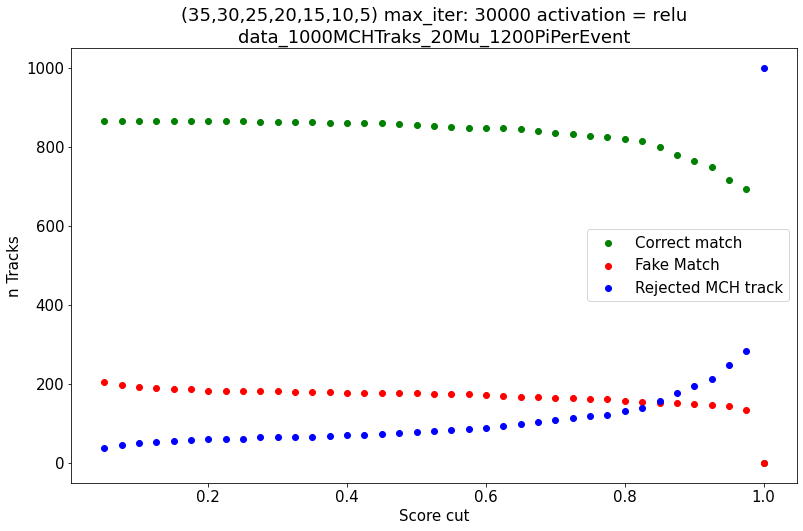

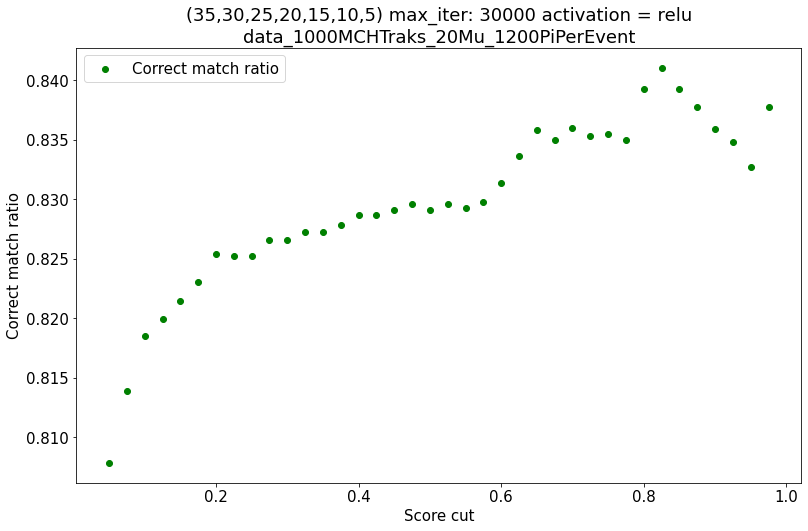

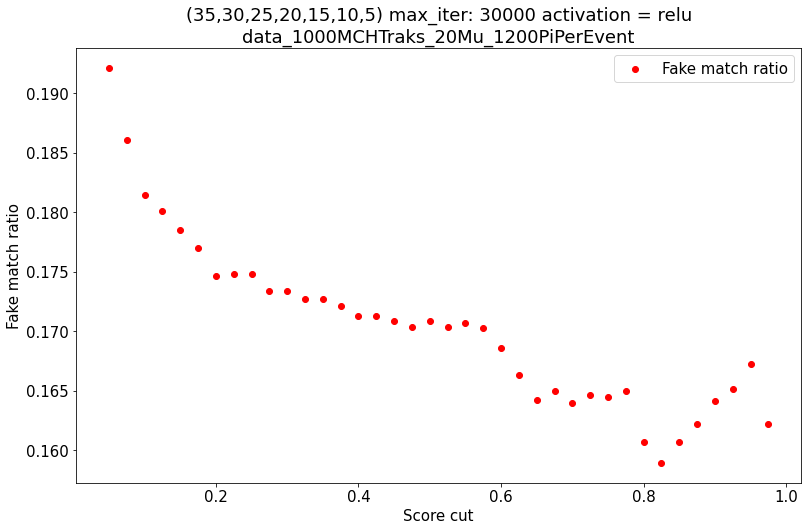

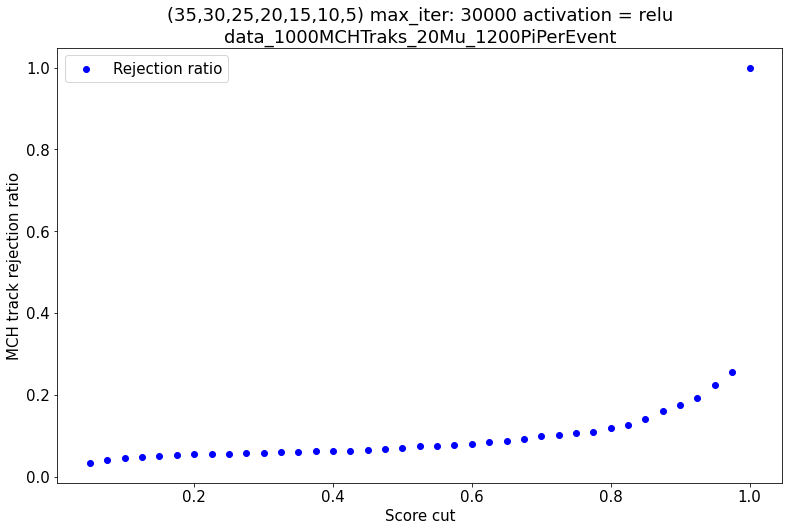

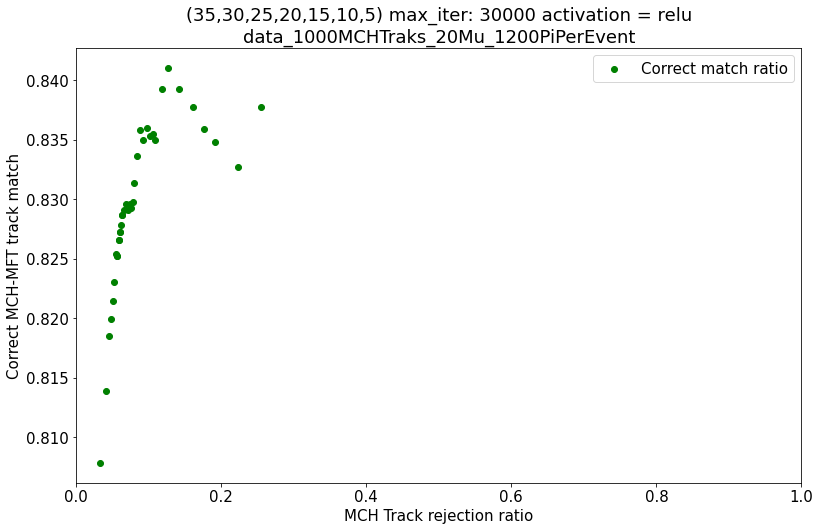

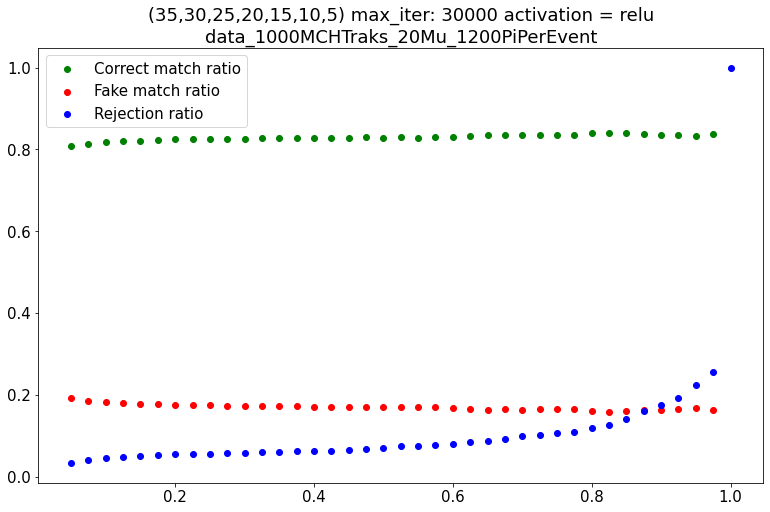

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [866. 866. 866. 865. 865. 865. 865. 864. 864. 863. 863. 862. 862. 861.
 861. 861. 859. 857. 854. 852. 850. 848. 848. 847. 845. 840. 836. 832.
 828. 825. 820. 815. 799. 780. 764. 748. 717. 692.   0.]
fake matches:  [206. 198. 192. 190. 188. 186. 183. 183. 183. 181. 181. 180. 180. 179.
 178. 178. 177. 176. 176. 175. 175. 174. 172. 169. 166. 166. 164. 164.
 163. 163. 157. 154. 153. 151. 150. 148. 144. 134.   0.]
no matches:  [  37.   45.   51.   54.   56.   58.   61.   62.   62.   65.   65.   67.
   67.   69.   70.   70.   73.   76.   79.   82.   84.   87.   89.   93.
   98.  103.  109.  113.  118.  121.  132.  140.  157.  178.  195.  213.
  248.  283. 1000.]
Elapsed time benchmark ((35,30,25,20,15,10,5) max_iter: 30000 activati

/home/alidocklite/alice/matching/piparamBackground/ml/ML_matcher_helpers.py:120: RuntimeWarning: invalid value encountered in true_divide
  correct_match_ratio = N_correct_matchArr/(N_correct_matchArr+N_fake_matchArr)
/home/alidocklite/alice/matching/piparamBackground/ml/ML_matcher_helpers.py:121: RuntimeWarning: invalid value encountered in true_divide
  fake_match_ratio = N_fake_matchArr/(N_correct_matchArr+N_fake_matchArr)


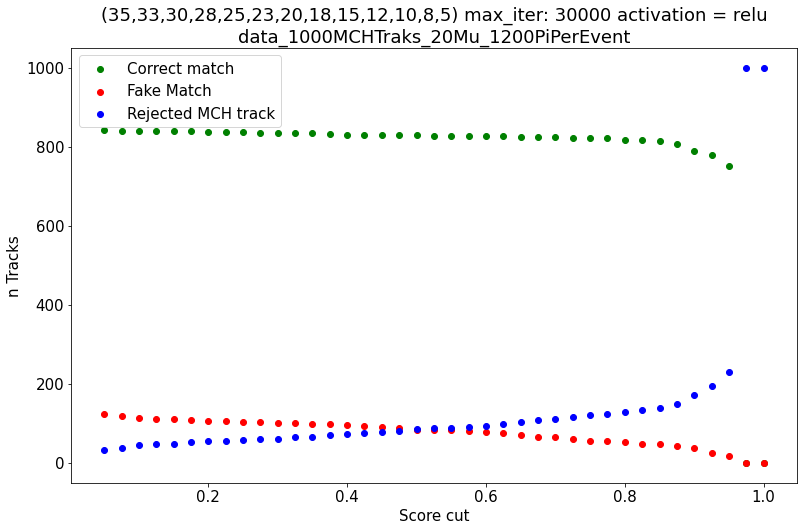

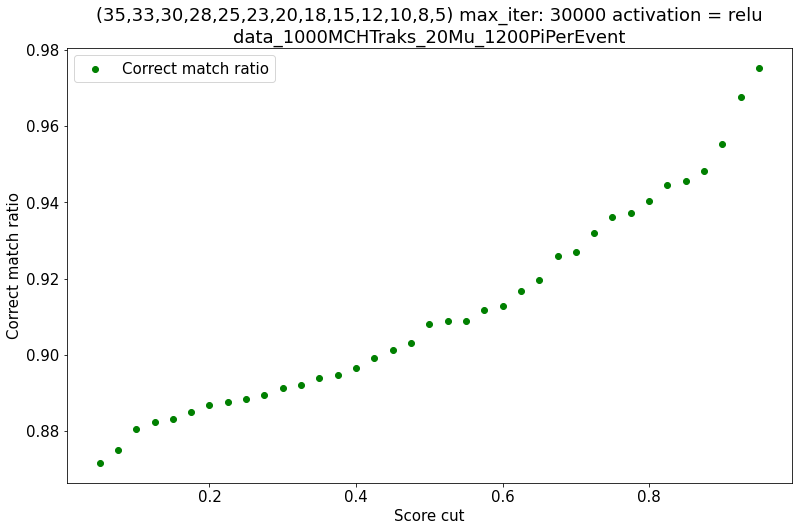

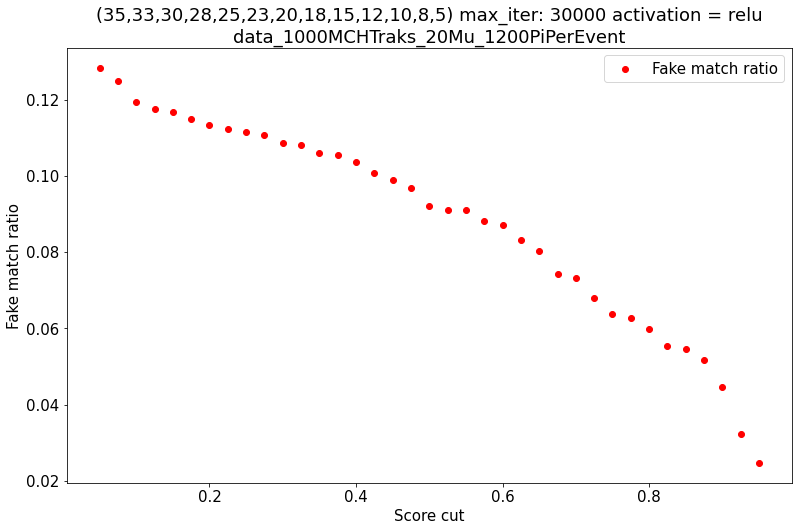

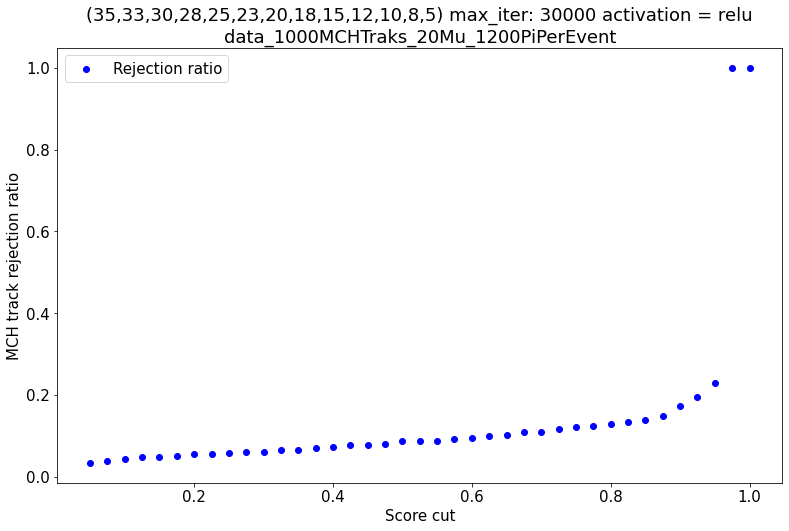

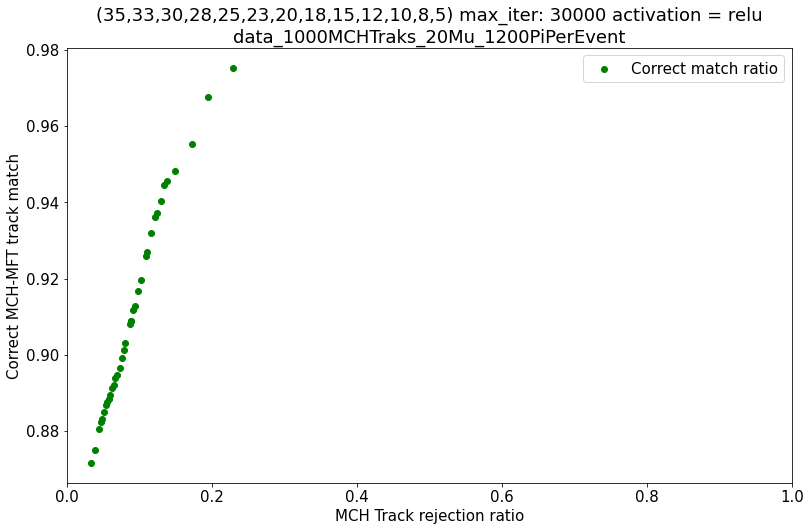

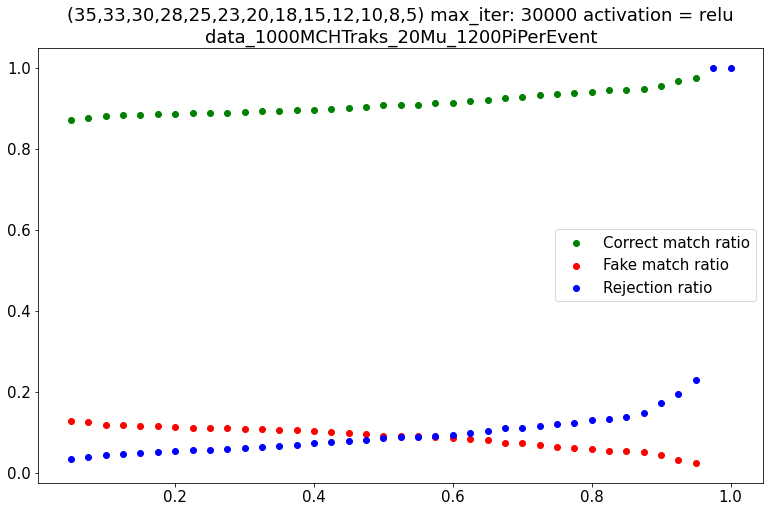

cuts:  [0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325
 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625
 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925
 0.95  0.975 1.   ]
correct matches :  [842. 841. 841. 840. 840. 839. 838. 838. 837. 836. 836. 834. 834. 832.
 831. 830. 830. 830. 829. 828. 828. 828. 827. 826. 825. 824. 824. 823.
 822. 821. 818. 818. 815. 807. 790. 779. 751.   0.   0.]
fake matches:  [124. 120. 114. 112. 111. 109. 107. 106. 105. 104. 102. 101.  99.  98.
  96.  93.  91.  89.  84.  83.  83.  80.  79.  75.  72.  66.  65.  60.
  56.  55.  52.  48.  47.  44.  37.  26.  19.   0.   0.]
no matches:  [  34.   39.   45.   48.   49.   52.   55.   56.   58.   60.   62.   65.
   67.   70.   73.   77.   79.   81.   87.   89.   89.   92.   94.   99.
  103.  110.  111.  117.  122.  124.  130.  134.  138.  149.  173.  195.
  230. 1000. 1000.]
Elapsed time benchmark ((35,33,30,28,25,23,20,18,15,12,10,8,5) max_ite

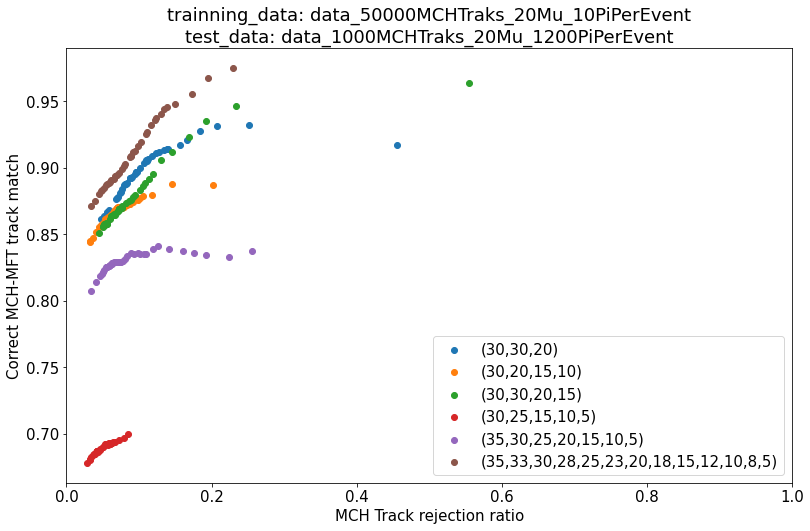

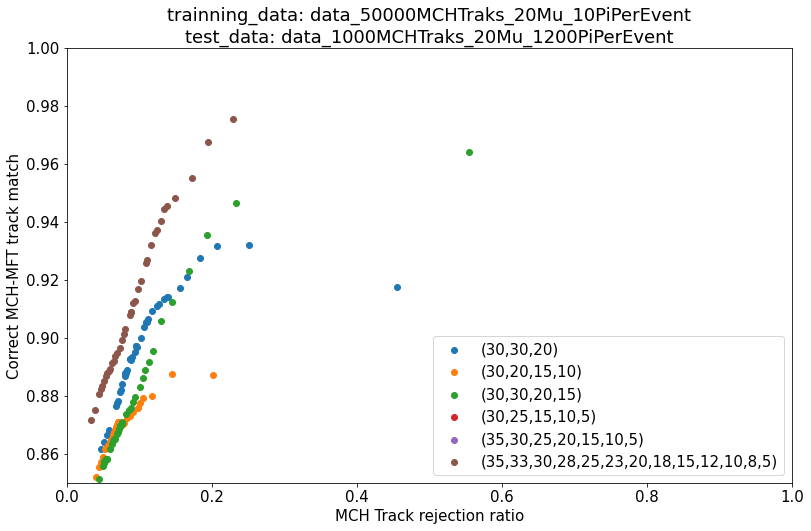

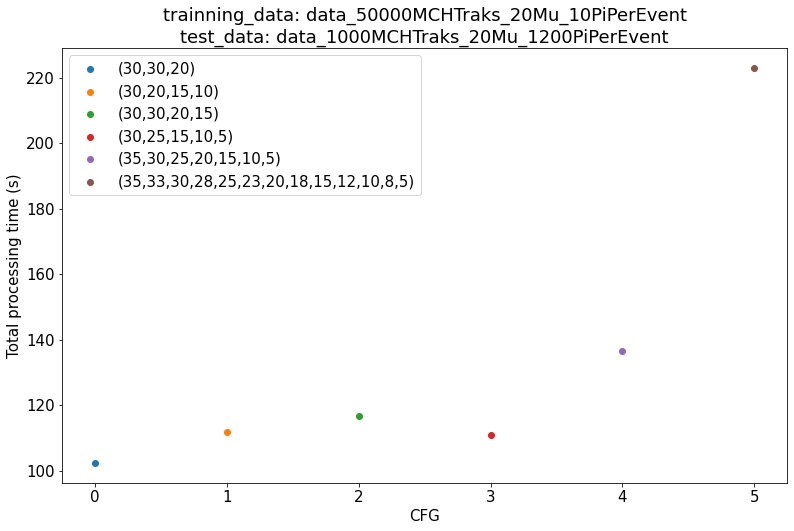

runBenchmarksMLPR completed on on 13 Nov 2020 17:19:07


In [5]:
trainning_data_file = "data_50000MCHTraks_20Mu_10PiPerEvent"
test_data_file = "data_1000MCHTraks_20Mu_1200PiPerEvent"


base_config = {
    'hidden_layers_cfg': (1,),
    'solver': 'adam',
    'max_iter': int(30000),
    'activation': 'relu',
    'trainning_data_file': trainning_data_file,
    'test_data_file': test_data_file
}

hidden_layers_configs = [(30,30,20),
                         (30,20,15,10),
                         (30,30,20,15),
                         (30,25,15,10,5),
                         (35,30,25,20,15,10,5),
                         (35,33,30,28,25,23,20,18,15,12,10,8,5),
                        ]
    
#quick_test=True
quick_test=False
if(quick_test):
    base_config['max_iter'] = int(100)
    trainning_data_file = "data_1000MCHTraks_20Mu_10PiPerEvent"
    test_data_file = "data_1000MCHTraks_20Mu_200PiPerEvent"
    base_config['trainning_data_file'] = trainning_data_file
    base_config['test_data_file'] = test_data_file
    hidden_layers_configs = [(30,15,5),
                             (30,20,15)
                            ]


configurations = []

for hlcfg in hidden_layers_configs:
    #print("Loop over hidden_layers_configs: setting", hlcfg)
    config=base_config.copy()
    config['hidden_layers_cfg']=hlcfg
    #print("Setting configuration: ", config)
    configurations.append(config)

# Run Benchmark and results to results_list
results_list.append(runBenchmarksMLPR(configurations, trainning_data_file, test_data_file))
